<a href="https://colab.research.google.com/github/paulinerosegut/HS21_BigDataAnalysis_FinalProject_Gut_Chen/blob/main/FinalProject_6MWTprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Walking is mediated through a finely balanced and carefully coordinated interplay of the musculoskeletal and nervous system [1, 2]. Damage to the brain and, especially, the spinal cord can impair walking function, a frequent and relevant symptom in neurological diseases or conditions such as multiple sclerosis (MS) [3] or traumatic spinal cord injury (SCI) [4]. MS is a chronic, autoimmune, inflammatory disease of the central nervous system (CNS). The
spinal cord is a common site of inflammatory destruction in MS with frequent involvement of the long descending and ascending fibre tracts [5, 6]. Three quarters of people with MS report reduced mobility throughout their lifetime [7]. Spinal cord damage can be caused by inflammation as in multiple sclerosis (MS) or may result from trauma (traumatic SCI) or ischemia (ischemic SCI) [8, 9]. About half of all lesions in SCI are functionally incomplete with some motor or sensory function preserved below the level of the injury which may allow for some recovery of walking function [8, 10]. Regaining walking ability is thus a priority for subjects with spinal disorders and a main goal in the field of neurorehabilitation [11, 12].

After spinal cord damage, gait disturbances are heterogeneous with different aspects of ambulatory function being affected to varying degrees [13, 14] including muscle strength, coordination and balance. Recovery of locomotor function after CNS damage is enhanced by training [3, 15–19]. In clinical practice, therapy of walking dysfunction is usually adapted to the individual capabilities at the beginning and throughout the course of therapy, requiring valid and repeated evaluations by experienced therapists. Visual inspection of gait and various scoring systems (e.g., Expanded Disability Status Scale (EDSS), Walking Index for Spinal Cord Injury (WISCI)) and clinical walking tests (e.g., timed walking tests assessing maximal speed and endurance, balance scores) are frequently used as readouts of ambulatory function in MS [20–23] and SCI [24, 25]. However, these measures provide only limited information about specific gait deficits, are generally insensitive to change, and may be affected by subjectivity [21, 26, 27]. On the other hand, these measures seem to be clinically meaningful and valid as they measure function closely related to everyday tasks [21, 26]. Clinical scores and walking tests, such as the endurance six-minute walk test (6MWT), are thus frequently used as primary endpoints in clinical interventional trials [28].

Three-dimensional (3D) full-body kinematic movement analysis, a more recent technique, provides objective and quantitative measures. This technique is able to unravel the individual factors underlying a given patient’s gait dysfunction, even in complex neurological conditions such as MS [21, 29–31] or SCI [4, 32, 33]. 3D gait analysis permits the cataloguing and processing of numerous kinematic parameters (e.g., spatiotemporal data, joint angles etc.)
[21, 32]. Today, it represents the gold standard in assessing locomotor dysfunction in humans [21]. Such techniques are informative concerning how exactly patients move and provide more in-depth insights into complex walking dysfunctions. However, among these many kinematic parameters, there is no evidence to date as to which are the most revealing for daily walking, or more precisely, for the endurance test (6MWT).

In this project, a better understanding of the gait parameters important for the outcome of the 6MWT, a test measuring walking distance after six minutes that is closely related to daily walking, will be investigated. In this way, therapies aimed at restoring walking function in MS and SCI patients could be better tailored.


# Methods
71 patients from Balgrist with MS or SCI will be retrospectively included in the study. All patients underwent 3D motion analysis where they walked for 30 seconds on a treadmill (120 Hz, FDM-T, Zebris Medical GmbH, Germany). The gait was laboratory equipped with 27 infrared cameras recording via Nexus (Vicon, Oxford, UK) motion capture software at a sampling rate of 200 Hz. Twenty-nine reflective markers (14 mm diameter) were placed on the skin based on the full-body gait model (Plug-in-Gait, Vicon, UK). All patients walked on the treadmill at a fixed speed of 2.5 km/h. Data were processed using
Vicon Nexus motion capture software (Vicon, Oxford, UK) and the gait parameters were extracted using an in-house made MATLAB algorithm (2020b, The Mathworks Inc. Natick, Massachusetts, United States). A set of 38 gait parameters, such as range of motion at different joints, stability, leg coordination, symmetry, end-point measures, gait phases and variability [34], were calculated for each patient. Bilateral gait parameters were distinguished between the more impaired (MI) leg and the less impaired (LI) leg, instead of left and right.
Impairments in each leg were assessed by a physician during a neurological examination. For each gait parameter, the mean for each step cycle and then the mean of all the steps were calculated for each patient. In addition, patients performed the 6MWT.

In order to characterise which gait parameters are the most important in the 6MWT outcome, a prediction analysis will be conducted. The analysis will be performed in Python 3 (Python Software Foundation. Python Language Reference, version 3.8. Available at http://www.python.org). Using the python package scikit-learn, supervised machine learning, more specifically linear regression and classification, such as logistic regression and support vector machine (SVM), will be implemented. In order to identify how many classes are necessary for the prediction of the 6MWT with SVM, k-nearest neighbours (kNN) will be used. In addition, feature selection, more specifically sequential feature selection using the python package mlxtend, will be implemented to find the best set of gait parameters predicting the 6MWT. Finally, an evaluation of the predictions of each algorithm will be analysed in terms of root mean square errors (RMSE) for regression and confusion matrix for classification.

# Pauline

From here until the name of the other student (after linear regression), Boqi Chen, the data analysis was done by Pauline Gut.

# Datasets

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Demographics

In [2]:
demographics = pd.read_csv('https://raw.githubusercontent.com/paulinerosegut/HS21_BigDataAnalysis_FinalProject_Gut_Chen/main/Demographics.csv?token=ARS7BP6TMLPR42XW5QE6JPTBTS4HU')
demographics.head()

,PatientID,Gender,Age,Pathology,Disease_duration,EDSS,Lesion_Level,AISA,6MWT,MI_Leg
0,1,F,45,SCI,12.0,NaN,T10,D,608,L
1,2,M,30,SCI,7.0,NaN,T11,D,580,R
2,3,M,73,SCI,189.0,NaN,C7,D,660,L
3,4,M,43,SCI,165.0,NaN,C4,D,435,L
4,5,M,41,SCI,150.0,NaN,C7,D,683,R


In [3]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PatientID         71 non-null     int64  
 1   Gender            71 non-null     object 
 2   Age               71 non-null     int64  
 3   Pathology         71 non-null     object 
 4   Disease_duration  70 non-null     float64
 5   EDSS              39 non-null     float64
 6   Lesion_Level      32 non-null     object 
 7   AISA              32 non-null     object 
 8   6MWT              71 non-null     int64  
 9   MI_Leg            71 non-null     object 
dtypes: float64(2), int64(3), object(5)
memory usage: 5.7+ KB


### Gait parameters

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/paulinerosegut/HS21_BigDataAnalysis_FinalProject_Gut_Chen/main/GaitParameters_MeanValues.csv?token=ARS7BP647XGAMVID73GLAFTBTS4KY')
df.head()

,PatientID,DoubleLimbSupport,MI_Stance,LI_Stance,StepWidth,MI_StepLength,LI_StepLength,MI_ToeHeight,LI_ToeHeight,MI_HipFlexion_Extension,LI_HipFlexion_Extension,MI_HipAbduction_Adduction,LI_HipAbduction_Adduction,MI_KneeFlexion_Extension,LI_KneeFlexion_Extension,MI_AnkleFlexion_Extension,LI_AnkleFlexion_Extension,SpineLateral_Flexion,SpineFlexion_Extension,C7TrajectoryLength,COMML,COMAP,HipASI,KneeASI,AnkleASI,LegPhaseDispersion,SSDMI_HipMI_Knee,SSDLI_HipLI_Knee,SSDMI_KneeMI_Ankle,SSDLI_KneeLI_Ankle,ACCMI_HipMI_Knee,ACCLI_HipLI_Knee,ACCMI_KneeMI_Ankle,ACCLI_KneeLI_Ankle,COVMI_StepLength,COVLI_StepLength,COVStepWidth,COVC7,6MWT
0,1,40.561167,70.707071,71.277997,103.659175,470.334541,476.277828,27.493149,27.491118,37.735770,36.034530,11.697101,10.913051,50.162964,49.494401,28.165459,30.636414,0.894091,-4.535361,145.846073,47.730483,17.908042,4.472639,2.770041,8.493871,49.667878,0.914553,1.199465,2.022550,1.564936,0.992296,0.993904,0.977612,0.987868,0.025409,0.020163,0.102948,0.066306,608
1,2,37.439614,69.169960,69.872639,113.192750,445.427896,411.142245,47.798526,24.677593,36.310316,35.028409,14.951478,18.227931,55.297972,45.591811,20.402975,20.150739,-0.384519,-6.038282,163.916030,39.272235,24.458508,4.456110,17.400092,10.894105,50.917693,2.020207,1.366663,4.226179,2.286283,0.970886,0.976266,0.935097,0.954622,0.045577,0.043309,0.255861,0.071024,580
2,3,38.578972,70.270891,69.788797,98.529591,480.244244,453.768167,16.184813,23.731106,40.643418,35.302048,8.062037,7.108703,39.130164,24.811085,18.743314,24.410080,-3.116071,-11.106234,198.529211,59.172352,27.583166,13.060106,36.419205,22.860943,49.939540,3.285648,3.978193,4.014319,4.701067,0.969292,0.985264,0.954472,0.950329,0.027551,0.034217,0.122458,0.070346,660
3,4,38.978015,69.815805,70.647653,120.233731,440.851850,422.273628,27.509750,32.613873,33.884592,34.719273,8.247178,10.649617,33.199151,48.882775,20.658857,19.807507,-3.274720,-15.361361,225.328160,54.830990,29.374773,5.315396,31.926865,11.785816,51.810222,1.845620,2.717135,2.657878,3.207750,0.977331,0.974214,0.950128,0.959368,0.068034,0.080128,0.175179,0.103513,435
4,5,38.909091,69.979798,70.303030,62.236637,425.175593,420.913803,23.223134,25.383125,32.135633,32.089734,9.092947,7.989464,53.502745,55.649666,22.757721,29.166064,-0.893139,0.870194,166.756233,36.316662,21.730780,3.754159,4.257673,21.511553,49.496731,2.288559,2.089971,2.350893,2.046244,0.982626,0.988945,0.964738,0.982626,0.035682,0.030656,0.377876,0.079762,683


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  71 non-null     int64  
 1   DoubleLimbSupport          71 non-null     float64
 2   MI_Stance                  71 non-null     float64
 3   LI_Stance                  71 non-null     float64
 4   StepWidth                  71 non-null     float64
 5   MI_StepLength              71 non-null     float64
 6   LI_StepLength              71 non-null     float64
 7   MI_ToeHeight               71 non-null     float64
 8   LI_ToeHeight               71 non-null     float64
 9   MI_HipFlexion_Extension    71 non-null     float64
 10  LI_HipFlexion_Extension    71 non-null     float64
 11  MI_HipAbduction_Adduction  71 non-null     float64
 12  LI_HipAbduction_Adduction  71 non-null     float64
 13  MI_KneeFlexion_Extension   71 non-null     float64
 

In [6]:
df.describe()

,PatientID,DoubleLimbSupport,MI_Stance,LI_Stance,StepWidth,MI_StepLength,LI_StepLength,MI_ToeHeight,LI_ToeHeight,MI_HipFlexion_Extension,LI_HipFlexion_Extension,MI_HipAbduction_Adduction,LI_HipAbduction_Adduction,MI_KneeFlexion_Extension,LI_KneeFlexion_Extension,MI_AnkleFlexion_Extension,LI_AnkleFlexion_Extension,SpineLateral_Flexion,SpineFlexion_Extension,C7TrajectoryLength,COMML,COMAP,HipASI,KneeASI,AnkleASI,LegPhaseDispersion,SSDMI_HipMI_Knee,SSDLI_HipLI_Knee,SSDMI_KneeMI_Ankle,SSDLI_KneeLI_Ankle,ACCMI_HipMI_Knee,ACCLI_HipLI_Knee,ACCMI_KneeMI_Ankle,ACCLI_KneeLI_Ankle,COVMI_StepLength,COVLI_StepLength,COVStepWidth,COVC7,6MWT
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,36.000000,38.670674,69.207431,70.890831,128.141952,428.559623,413.267816,25.669494,26.156560,36.261823,38.733822,9.719733,9.977813,42.453426,46.905200,23.172610,27.201306,0.154338,-3.126009,214.067334,49.979401,32.366295,11.280767,22.743480,24.301930,49.777952,3.412371,2.878812,4.756610,4.166358,0.957404,0.973574,0.922246,0.936674,0.055576,0.056325,0.212828,0.089741,482.338028
std,20.639767,2.845055,2.200124,1.639531,42.274082,51.347497,53.174902,11.576406,10.034006,5.988194,5.616207,2.995576,2.909923,13.889039,11.766448,9.516568,13.277136,4.118837,8.980472,61.834949,14.957141,11.134593,9.888739,18.667395,14.105219,3.127885,1.689176,1.148371,2.155543,1.856664,0.040118,0.012754,0.053022,0.038580,0.023094,0.020388,0.205449,0.024700,114.369819
min,1.000000,30.610452,62.892079,67.935768,26.297509,297.112137,302.497942,7.331035,-22.324992,22.483565,29.260143,3.805951,4.523357,13.517853,11.132290,11.701314,12.386806,-9.322600,-21.396708,109.992634,25.197813,14.667634,2.994966,2.770041,6.364573,38.984306,0.914553,0.959185,2.022550,1.263138,0.765258,0.927676,0.711280,0.792681,0.025409,0.020163,0.063025,0.041008,213.000000
25%,18.500000,37.293571,68.288440,69.890023,103.596464,400.920225,376.306348,17.639732,21.694503,32.689287,35.623320,8.107850,7.986064,31.690820,40.264608,17.342436,20.343394,-2.697719,-8.954118,168.082235,38.647774,25.345833,5.383885,7.809788,13.152751,48.682990,2.156985,2.041673,3.235199,2.900508,0.956213,0.968982,0.904172,0.926034,0.038020,0.041570,0.126888,0.070187,405.000000
50%,36.000000,38.909091,69.696970,70.562771,127.964916,425.679220,409.894013,23.687495,26.732227,36.307242,37.846334,9.396934,9.640367,43.220008,49.273306,20.658857,23.455451,-0.308172,-2.933410,205.083427,47.709683,29.786343,7.686148,14.276303,20.893574,49.542661,3.046760,2.780643,4.134200,3.960648,0.971279,0.975856,0.934301,0.945753,0.050449,0.051855,0.163559,0.090471,474.000000
75%,53.500000,40.533366,70.485044,71.837422,150.261316,460.621021,447.999618,30.809345,29.806623,39.740237,40.601421,11.229954,11.331103,54.152209,55.144777,26.323950,30.705735,2.732839,2.480146,235.351191,58.433613,36.467336,13.282215,35.925427,31.341058,51.007897,4.104562,3.412531,5.796713,5.248047,0.978783,0.982278,0.956635,0.959583,0.065936,0.071929,0.235386,0.103346,580.000000
max,71.000000,45.727546,73.693456,76.262626,246.147689,562.426223,536.674484,75.188851,48.715432,56.234794,57.003163,19.080865,18.227931,74.401158,64.127072,72.264476,96.303639,7.941819,23.525453,453.240959,93.396725,69.630148,49.286937,67.914517,59.553515,57.474821,7.253001,7.156958,10.122751,9.584818,0.992296,0.993904,0.979680,0.987868,0.161571,0.107153,1.747591,0.157097,711.000000


# Data visualization

### Demographics


In [7]:
demographics.head(1)

,PatientID,Gender,Age,Pathology,Disease_duration,EDSS,Lesion_Level,AISA,6MWT,MI_Leg
0,1,F,45,SCI,12.0,NaN,T10,D,608,L


Let's have a look at the age distribution in the population.

Text(0.5, 1.0, 'Age distribution in  patients')

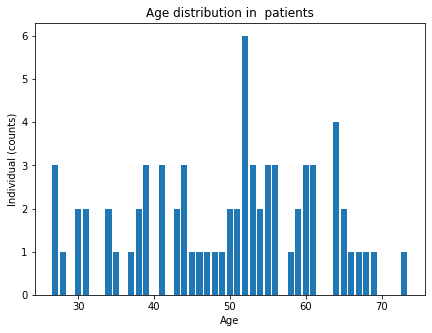

In [8]:
Age_coutns = demographics['Age '].value_counts()

plt.figure(figsize = (7,5))
plt.bar(Age_coutns.index, Age_coutns.values)
plt.xlabel('Age')
plt.ylabel('Individual (counts)')
plt.title('Age distribution in  patients')

Let's have a look at the gender distribution in the population.

The proportion between women and men is:  [0.97222222]


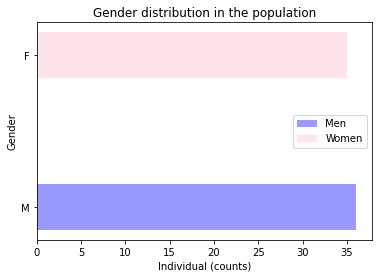

In [9]:
female = demographics['Gender'] == 'F'
female_counts = demographics[female]['Gender'].value_counts()
male = demographics['Gender'] == 'M'
male_counts = demographics[male]['Gender'].value_counts()

width=0.3
plt.barh(male_counts.index, male_counts.values, width, alpha=0.4, color = 'blue', label = 'Men')
plt.barh(female_counts.index, female_counts.values, width, alpha=0.4, color ='pink', label = 'Women')
plt.legend()
plt.xlabel('Individual (counts)')
plt.ylabel('Gender')
plt.title('Gender distribution in the population')

print('The proportion between women and men is: ', female_counts.values/male_counts.values)

The proportion between men and women in the dataset is almost one, which means there are almost as many women as men in the population.

Let's have a look at the pathology distibution in the population.

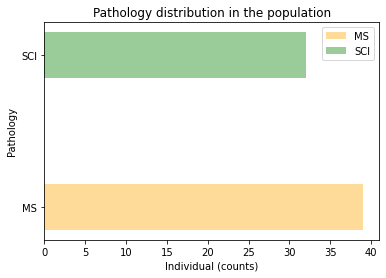

In [10]:
MS  = demographics['Pathology'] == 'MS'
MS_coutns = demographics[MS]['Pathology'].value_counts()

SCI  = demographics['Pathology'] == 'SCI'
SCI_coutns = demographics[SCI]['Pathology'].value_counts()

width=0.3
plt.barh(MS_coutns.index, MS_coutns.values, width, alpha=0.4, color = 'orange', label = 'MS')
plt.barh(SCI_coutns.index, SCI_coutns.values, width, alpha=0.4, color = 'green', label = 'SCI')
plt.ylabel('Pathology')
plt.xlabel('Individual (counts)')
plt.title('Pathology distribution in the population')
plt.legend()

There are more MS patients than SCI patients in the population, but there is not an extreme difference.

Let's have a look at the age distibution across SCI and MS patients.

Text(0.5, 1.0, 'Age distribution in SCI patients')

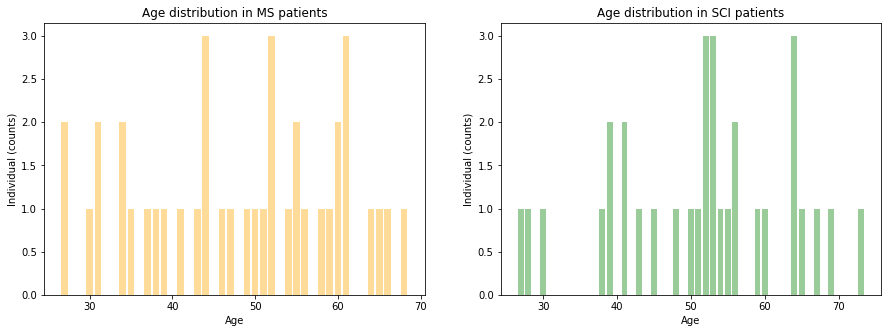

In [11]:
MS  = demographics['Pathology'] == 'MS'
MS_coutns = demographics[MS]['Age '].value_counts()

SCI  = demographics['Pathology'] == 'SCI'
SCI_coutns = demographics[SCI]['Age '].value_counts()

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.bar(MS_coutns.index, MS_coutns.values, alpha=0.4, color = 'orange')
plt.xlabel('Age')
plt.ylabel('Individual (counts)')
plt.title('Age distribution in MS patients')

plt.subplot(1,2,2)
plt.bar(SCI_coutns.index, SCI_coutns.values, alpha=0.4, color = 'green')
plt.xlabel('Age')
plt.ylabel('Individual (counts)')
plt.title('Age distribution in SCI patients')

We cannot state from these 2 plots that are more young or old patients in one pathology group than another. It seems the age distribution between these 2 pathologies is quite similar.

Let's see the gender distribution across SCI and MS patients.

Text(0.5, 1.0, 'MS and SCI distributions across gender')

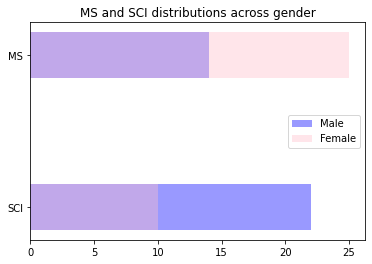

In [12]:
female = demographics['Gender'] == 'F'
female_counts = demographics[female]['Pathology'].value_counts()
male = demographics['Gender'] == 'M'
male_counts = demographics[male]['Pathology'].value_counts()

width=0.3
plt.barh(male_counts.index, male_counts.values, width, alpha=0.4, color = 'blue', label = 'Male')
plt.barh(female_counts.index, female_counts.values, width, alpha=0.4, color ='pink', label = 'Female')
plt.legend()
plt.title('MS and SCI distributions across gender')

From the bar plot we see that in population there are more men with SCI than women. This is a known trend, men present around 80 % of the overall SCI cases (McColl et al., 2004).

Let's see now the age distribution in SCI and MS in men and women.

Text(0.5, 1.0, 'Age distribution in MS men')

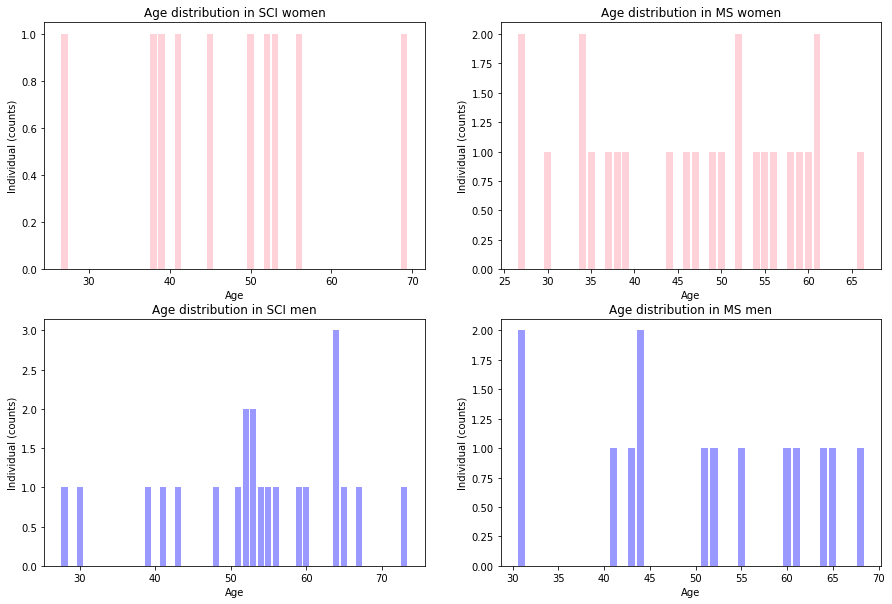

In [13]:
female_SCI = (female) & (demographics['Pathology'] == 'SCI')
female_MS = (female) & (demographics['Pathology'] == 'MS')
male_SCI = (male) & (demographics['Pathology'] == 'SCI')
male_MS = (male) & (demographics['Pathology'] == 'MS')


demographics[female_SCI]['Age '].value_counts()

plt.figure(figsize = (15, 10))
plt.subplot(2,2,1)
plt.bar(demographics[female_SCI]['Age '].value_counts().index, demographics[female_SCI]['Age '].value_counts().values, alpha=0.7, color = 'pink')
plt.xlabel('Age')
plt.ylabel('Individual (counts)')
plt.title('Age distribution in SCI women')

plt.subplot(2,2,2)
plt.bar(demographics[female_MS]['Age '].value_counts().index, demographics[female_MS]['Age '].value_counts().values, alpha=0.7, color = 'pink')
plt.xlabel('Age')
plt.ylabel('Individual (counts)')
plt.title('Age distribution in MS women')

plt.subplot(2,2,3)
plt.bar(demographics[male_SCI]['Age '].value_counts().index, demographics[male_SCI]['Age '].value_counts().values, alpha=0.4, color = 'blue')
plt.xlabel('Age')
plt.ylabel('Individual (counts)')
plt.title('Age distribution in SCI men')

plt.subplot(2,2,4)
plt.bar(demographics[male_MS]['Age '].value_counts().index, demographics[male_MS]['Age '].value_counts().values, alpha=0.4, color = 'blue')
plt.xlabel('Age')
plt.ylabel('Individual (counts)')
plt.title('Age distribution in MS men')

McColl et al., 2004, could demonstrate that men tend to be injured (SCI) at an earlier age in comparison to women. From our above plots, we do not see this trend, but similar age distribution between men and women with both MS and SCI.

Now let's have a look at the distribution of the lesion level in SCI patients.

In [14]:
demographics.head(1)

,PatientID,Gender,Age,Pathology,Disease_duration,EDSS,Lesion_Level,AISA,6MWT,MI_Leg
0,1,F,45,SCI,12.0,NaN,T10,D,608,L


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Lesion level distribution in SCI patients')

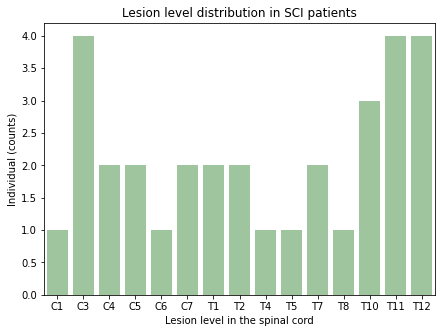

In [15]:
SCI = demographics['Pathology'] == 'SCI'

myorder = ['C1', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T4', 'T5', 'T7', 'T8', 'T10', 'T11', 'T12']

plt.figure(figsize = (7,5))
sns.barplot(demographics[SCI]['Lesion_Level'].value_counts().index, demographics[SCI]['Lesion_Level'].value_counts().values, alpha=0.4, color = 'green', order = myorder)
plt.xlabel('Lesion level in the spinal cord')
plt.ylabel('Individual (counts)')
plt.title('Lesion level distribution in SCI patients')

Let's group the patients in tetraplegic (C1-C7) and paraplegic (T1-T12), and see their distributions.

In [16]:
conditions = [demographics['Lesion_Level'] == 'C1', demographics['Lesion_Level'] == 'C3', demographics['Lesion_Level'] == 'C4',
              demographics['Lesion_Level'] == 'C5', demographics['Lesion_Level'] == 'C6', demographics['Lesion_Level'] == 'C7',
              demographics['Lesion_Level'] == 'T1', demographics['Lesion_Level'] == 'T2', demographics['Lesion_Level'] == 'T4',
              demographics['Lesion_Level'] == 'T5', demographics['Lesion_Level'] == 'T7', demographics['Lesion_Level'] == 'T8',
              demographics['Lesion_Level'] == 'T10', demographics['Lesion_Level'] == 'T11', demographics['Lesion_Level'] == 'T12']

choices = ['Tetraplegic', 'Tetraplegic', 'Tetraplegic', 'Tetraplegic', 'Tetraplegic', 'Tetraplegic',
           'Paraplegic', 'Paraplegic', 'Paraplegic', 'Paraplegic', 'Paraplegic', 'Paraplegic', 'Paraplegic', 'Paraplegic', 'Paraplegic']
           
demographics['Lesion_group'] = np.select(conditions, choices)

demographics.head()

,PatientID,Gender,Age,Pathology,Disease_duration,EDSS,Lesion_Level,AISA,6MWT,MI_Leg,Lesion_group
0,1,F,45,SCI,12.0,NaN,T10,D,608,L,Paraplegic
1,2,M,30,SCI,7.0,NaN,T11,D,580,R,Paraplegic
2,3,M,73,SCI,189.0,NaN,C7,D,660,L,Tetraplegic
3,4,M,43,SCI,165.0,NaN,C4,D,435,L,Tetraplegic
4,5,M,41,SCI,150.0,NaN,C7,D,683,R,Tetraplegic


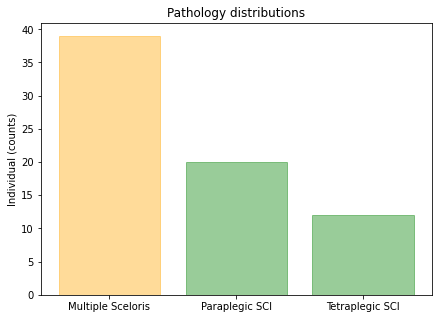

In [17]:
plt.figure(figsize = (7,5))
barlist = plt.bar(demographics['Lesion_group'].value_counts().index, demographics['Lesion_group'].value_counts().values, alpha=0.4)
plt.ylabel('Individual (counts)')
plt.title('Pathology distributions')
plt.xticks((0, 1, 2), ('Multiple Sceloris', 'Paraplegic SCI', 'Tetraplegic SCI'))
barlist[0].set_color('orange')
barlist[1].set_color('green')
barlist[2].set_color('green')


In our dataset, we have more paraplegic patients (lesion level between T1 and T12) than tetraplegic patients (lesion level between C1 and C7).

### Gait parameters

Now let's have a look at the gait parameters.

We can plot each gait parameter (feature) with the 6MWT.

In [18]:
len(df.columns)

39

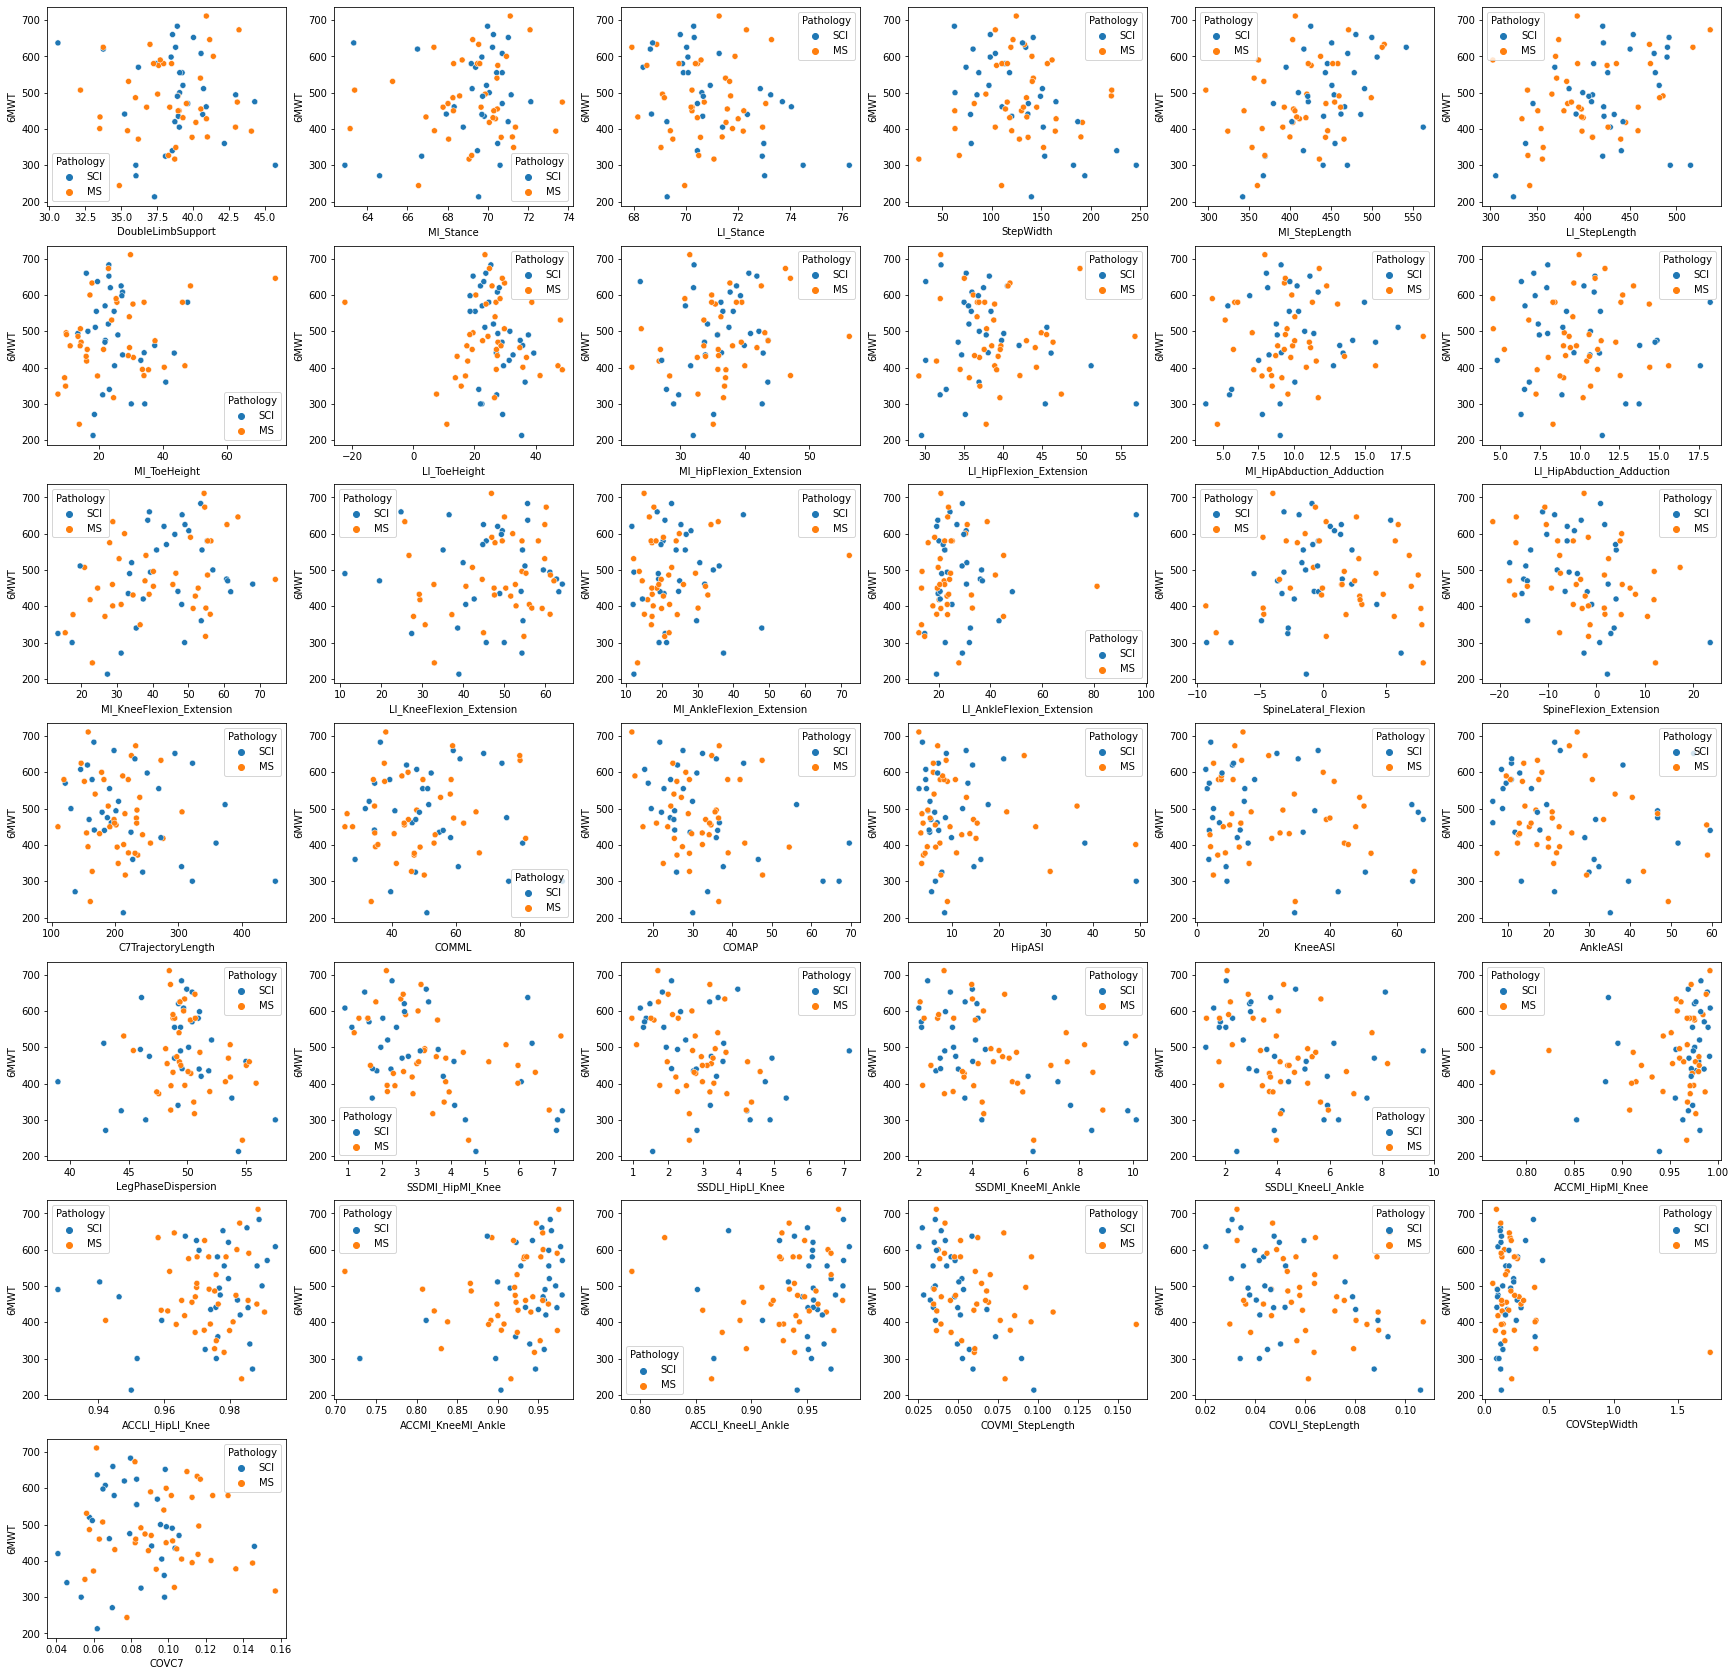

In [19]:
plt.figure(figsize = (30,30))
plt.title('Gait parameters vs 6MWT')
for i in range(1, 38):
  plt.subplot(7, 6, i)
  sns.scatterplot(x = df.iloc[:,i], y = df['6MWT'], hue = demographics['Pathology'])
  plt.xlabel(df.iloc[:,i].name)
  plt.ylabel('6MWT')


From this plot we can see the behavior between each gait parameter and the 6MWT. It seems there are no linear relationships between any of the gait parameters and the 6MWT. In order to know it, we need to do a correlation analysis (see correlation analysis section).

Also, it is not clear if we see distinct groups between SCI and MS. We can apply k-means clustering with 2 groups and see if we can classify each gait parameters in the corresponding groups (see k-means clustering section).

# Statistical analysis

In this study, we are interested in the 6MWT. The 6MWT is our output, or target variable. The gait parameters are the features. Before analysing the behavior between the features and the 6MWT, we can first have a look at the distribution of some demographics daty with respect to the 6MWT. In addition to the visualizazion of these distributions in the form of boxplots, we can also apply some statistical tests to see if the distibutions between different groups have a different 6MWT. In this study, the significance threshold is set at 0.05 (5%).

In [20]:
from scipy import stats
from statsmodels.stats.weightstats import ztest

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Gender

We would like to know if there is a significant difference between women and men in the 6MWT outcome. 

Let's do a z-test, because we are comparing two populations, to see if the two categories (women vs mean) have the same 6MWT.

Null hypothesis: the two categories of countries have the same 6MWT.

Alternate hypothesis: the two categories of countries have different 6MWT.

Significance threshold is 0.05.

Text(0.5, 1.0, 'Six-minute walk test across gender')

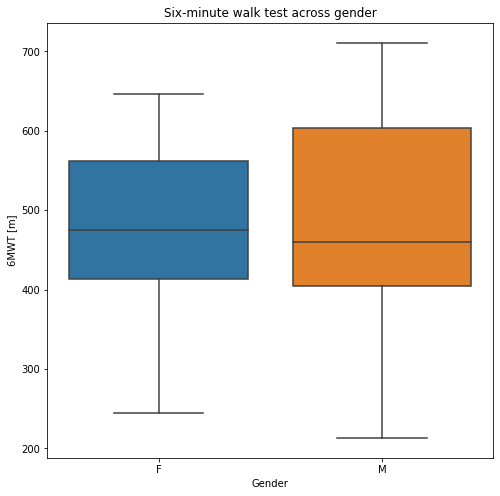

In [21]:
plt.figure(figsize = (8,8))
sns.boxplot(x = "Gender", y = '6MWT', data = demographics)
plt.ylabel('6MWT [m]')
plt.title('Six-minute walk test across gender')

In [22]:
females = demographics[demographics['Gender'] == 'F']['6MWT']
males = demographics[demographics['Gender'] == 'M']['6MWT']
# stats.ttest_ind(females, males)
ztest(females, males, alternative='two-sided')

(-0.509592914855578, 0.6103366886345682)

The p-value is higher than 0.05, which means there is no significant difference between men and women in the 6MWT outcome. In other words, men and women have same 6MWT.

#### Age

We would like to know if there is a significant difference between young and old patients in the 6MWT outcome. 

Let's do a z-test, because we are comparing two populations, to see if the two categories (young vs old) have the same 6MWT.

Null hypothesis: the two categories of countries have the same 6MWT.

Alternate hypothesis: the two categories of countries have different 6MWT.

Significance threshold is 0.05.

In order to separate the entire population into young vs old patients, we can calculate the mean age of the entire population. Patients with an age smaller than the mean age will be assigned to the group of young patients. Patients with an age greater than the mean age will be assigned to the group of old patients. 

In [23]:
# Let's calculate the mean age of the entire population
MeanAge = np.mean(demographics['Age '])
print('The mean age of the population is: ', MeanAge)

The mean age of the population is:  49.605633802816904


In [24]:
demographics.shape

(71, 11)

We create a new column named Age_group in which we assign the patient to either the young group or the old group.

In [25]:
for i in range(0,71):
  if demographics.loc[i,'Age '] <= MeanAge:
    demographics.loc[i, 'Age_group'] = 'Young'
  else:
    demographics.loc[i, 'Age_group'] = 'Old'
demographics.head()

,PatientID,Gender,Age,Pathology,Disease_duration,EDSS,Lesion_Level,AISA,6MWT,MI_Leg,Lesion_group,Age_group
0,1,F,45,SCI,12.0,NaN,T10,D,608,L,Paraplegic,Young
1,2,M,30,SCI,7.0,NaN,T11,D,580,R,Paraplegic,Young
2,3,M,73,SCI,189.0,NaN,C7,D,660,L,Tetraplegic,Old
3,4,M,43,SCI,165.0,NaN,C4,D,435,L,Tetraplegic,Young
4,5,M,41,SCI,150.0,NaN,C7,D,683,R,Tetraplegic,Young


Text(0.5, 1.0, 'Six-minute walk test in young and old patient groups')

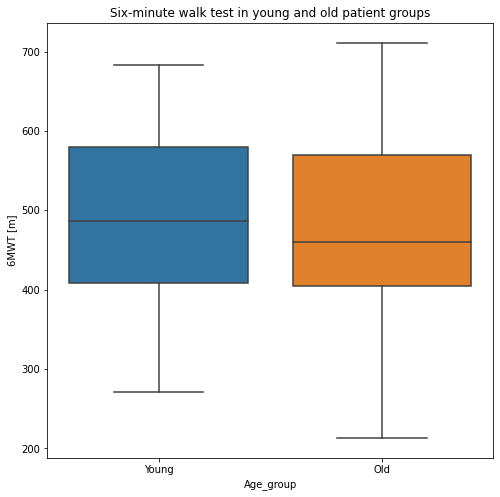

In [26]:
plt.figure(figsize = (8,8))
sns.boxplot(x = "Age_group", y = '6MWT', data = demographics)
plt.ylabel('6MWT [m]')
plt.title('Six-minute walk test in young and old patient groups')

Let's have a look if there is a difference in the 6MWT between young and old patients.

In [27]:
young = demographics['Age_group'] == 'Young'
old = demographics['Age_group'] == 'Old'

In [28]:
ztest(demographics[young]['6MWT'], demographics[old]['6MWT'], alternative='two-sided')

(0.5683276553351556, 0.5698125038187942)

The p-value is higher than 0.05, which means there is no significant difference between young and old patients in the 6MWT outcome. In other words, young and old patients have same 6MWT.

Text(0.5, 1.0, 'Six-minute walk test across SCI patients')

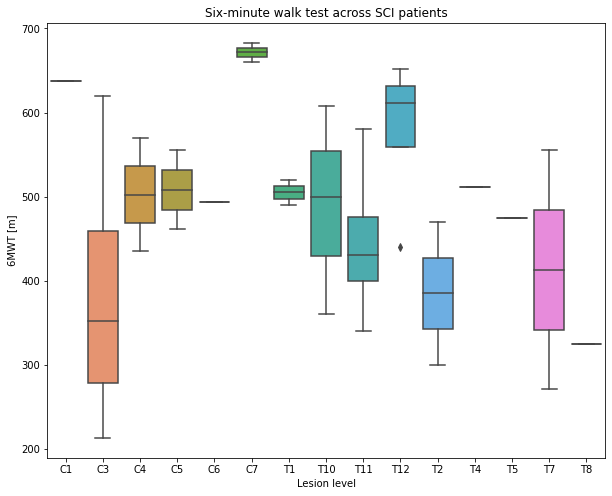

In [29]:
mydem = demographics.sort_values(by = ['Lesion_Level'], ascending = True)
plt.figure(figsize = (10,8))
sns.boxplot(x = "Lesion_Level", y = '6MWT', data = mydem)
plt.xlabel('Lesion level')
plt.ylabel('6MWT [m]')
plt.title('Six-minute walk test across SCI patients')

# Correlation analysis

We would like to see which gait parameters are correlated with the 6MWT.

In [30]:
df.head(1)

,PatientID,DoubleLimbSupport,MI_Stance,LI_Stance,StepWidth,MI_StepLength,LI_StepLength,MI_ToeHeight,LI_ToeHeight,MI_HipFlexion_Extension,LI_HipFlexion_Extension,MI_HipAbduction_Adduction,LI_HipAbduction_Adduction,MI_KneeFlexion_Extension,LI_KneeFlexion_Extension,MI_AnkleFlexion_Extension,LI_AnkleFlexion_Extension,SpineLateral_Flexion,SpineFlexion_Extension,C7TrajectoryLength,COMML,COMAP,HipASI,KneeASI,AnkleASI,LegPhaseDispersion,SSDMI_HipMI_Knee,SSDLI_HipLI_Knee,SSDMI_KneeMI_Ankle,SSDLI_KneeLI_Ankle,ACCMI_HipMI_Knee,ACCLI_HipLI_Knee,ACCMI_KneeMI_Ankle,ACCLI_KneeLI_Ankle,COVMI_StepLength,COVLI_StepLength,COVStepWidth,COVC7,6MWT
0,1,40.561167,70.707071,71.277997,103.659175,470.334541,476.277828,27.493149,27.491118,37.73577,36.03453,11.697101,10.913051,50.162964,49.494401,28.165459,30.636414,0.894091,-4.535361,145.846073,47.730483,17.908042,4.472639,2.770041,8.493871,49.667878,0.914553,1.199465,2.02255,1.564936,0.992296,0.993904,0.977612,0.987868,0.025409,0.020163,0.102948,0.066306,608


Let's see if we have empty values

In [31]:
df.isna().sum()

PatientID                    0
DoubleLimbSupport            0
MI_Stance                    0
LI_Stance                    0
StepWidth                    0
MI_StepLength                0
LI_StepLength                0
MI_ToeHeight                 0
LI_ToeHeight                 0
MI_HipFlexion_Extension      0
LI_HipFlexion_Extension      0
MI_HipAbduction_Adduction    0
LI_HipAbduction_Adduction    0
MI_KneeFlexion_Extension     0
LI_KneeFlexion_Extension     0
MI_AnkleFlexion_Extension    0
LI_AnkleFlexion_Extension    0
SpineLateral_Flexion         0
SpineFlexion_Extension       0
C7TrajectoryLength           0
COMML                        0
COMAP                        0
HipASI                       0
KneeASI                      0
AnkleASI                     0
LegPhaseDispersion           0
SSDMI_HipMI_Knee             0
SSDLI_HipLI_Knee             0
SSDMI_KneeMI_Ankle           0
SSDLI_KneeLI_Ankle           0
ACCMI_HipMI_Knee             0
ACCLI_HipLI_Knee             0
ACCMI_Kn

We do not have empty values.

Let's have a look at the correlation matrix.

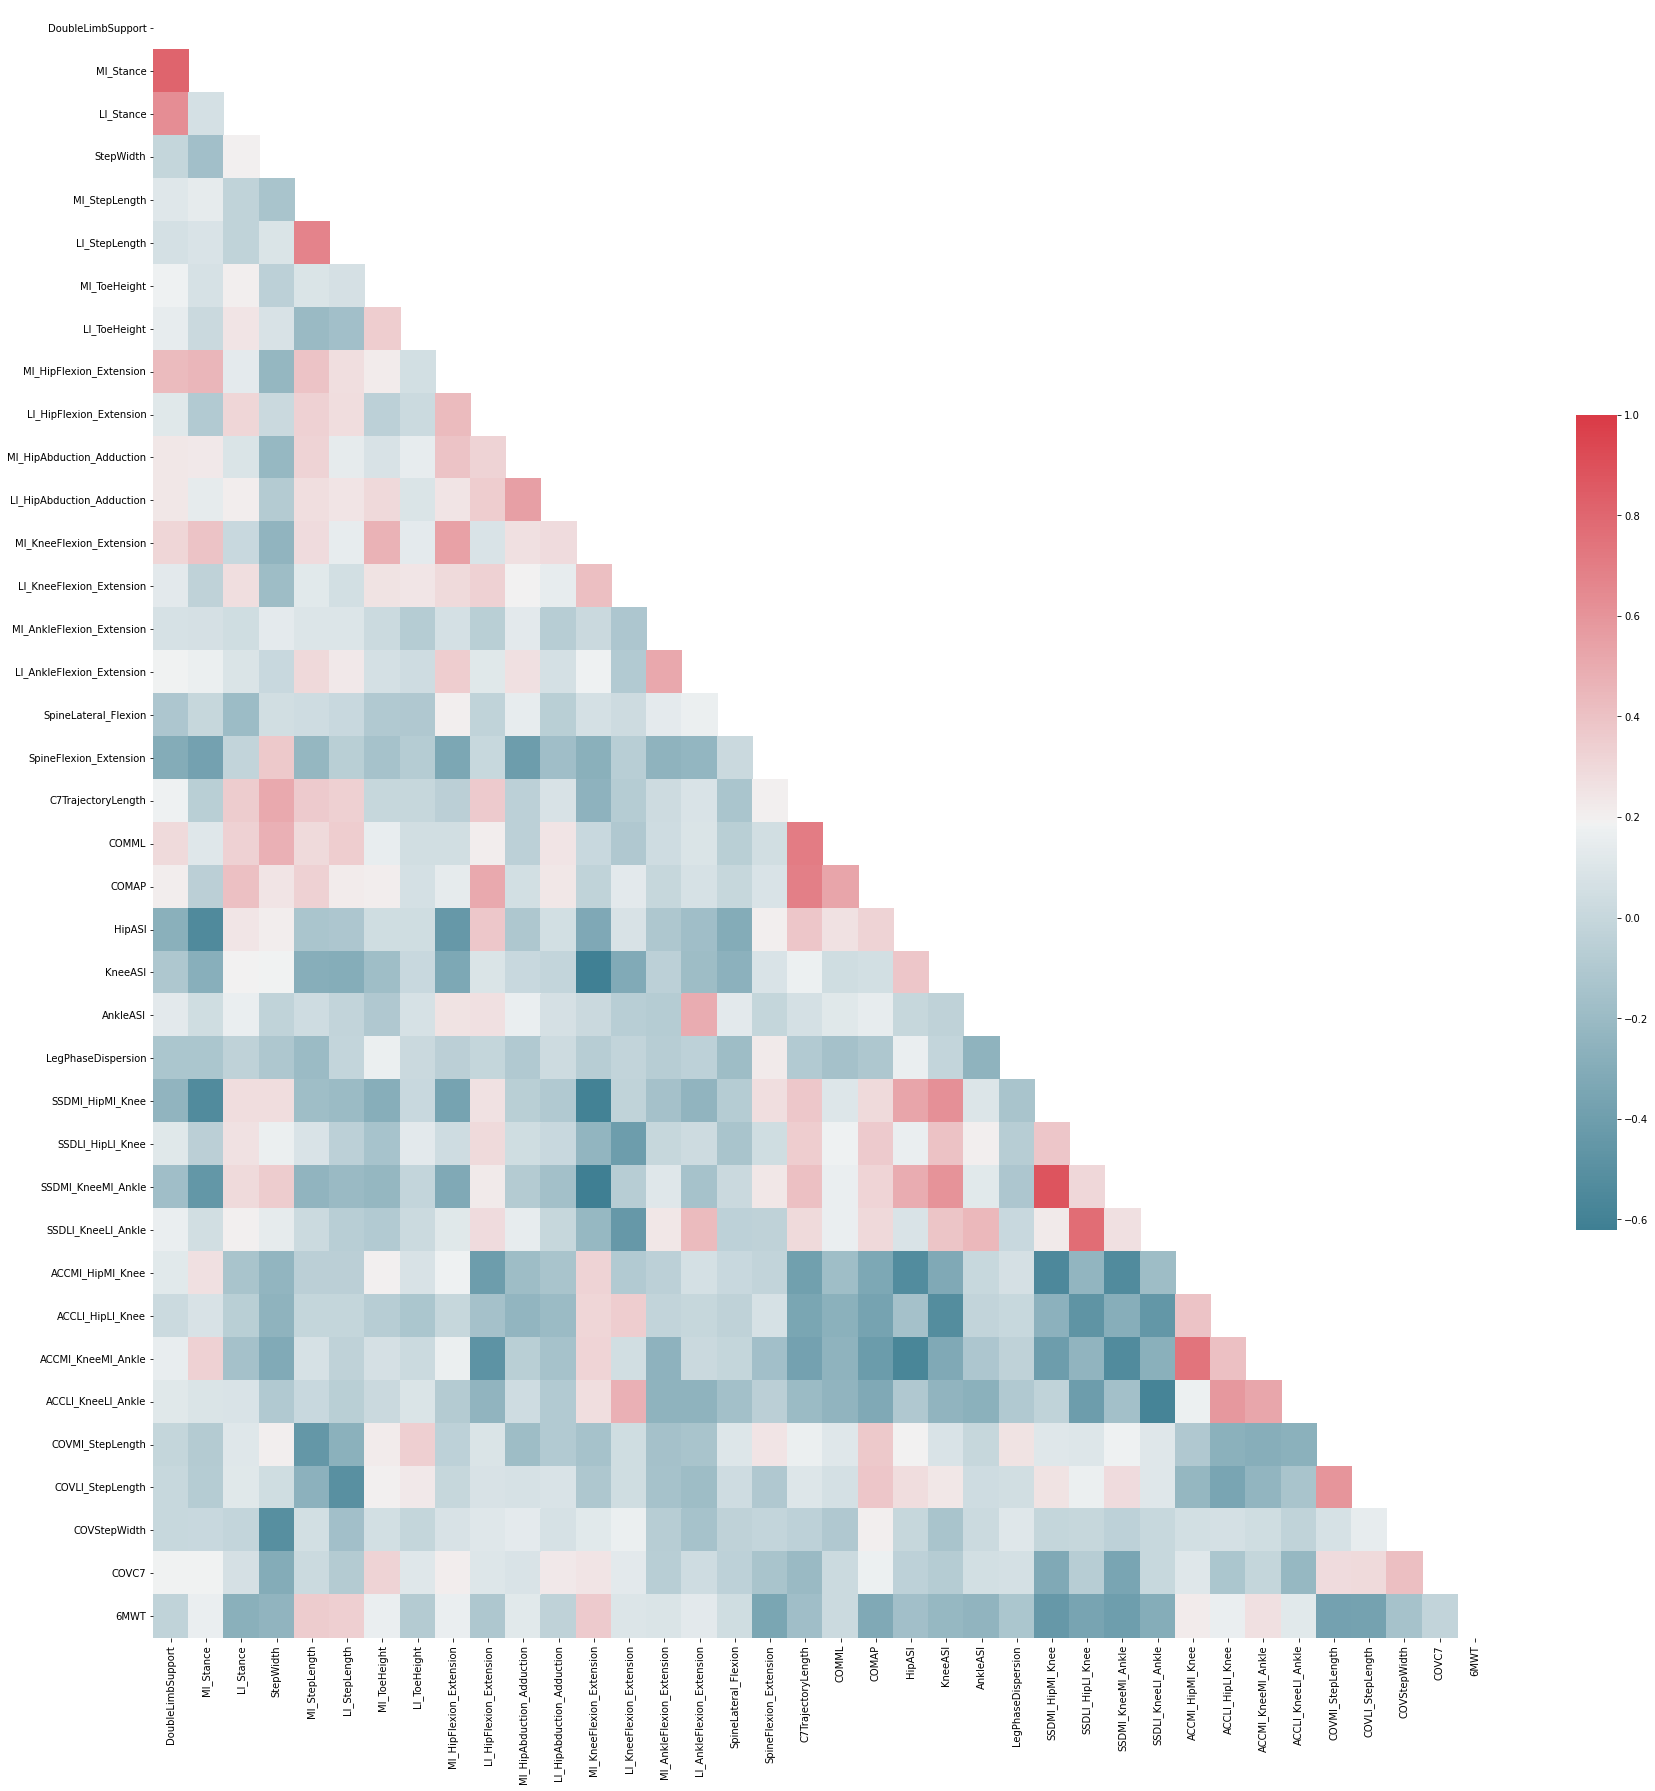

In [32]:
Data = df.drop(columns=['PatientID'])
#correlation matrix
corr=Data.corr()

#plotting correlation matrix
#plot just half of the correlation matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(30, 30))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,cmap=cmap, mask= mask, vmax=1, cbar_kws={"shrink": .5})

Let's have a look at the correlations with the 6MWT outocme that have a correlation coefficient higher than 0.5.

In [33]:
correlations = corr[abs(corr>.50)]['6MWT']
correlations = correlations[correlations.notna()]
correlations

6MWT    1.0
Name: 6MWT, dtype: float64

We see that there is no variable that are correlated with the 6MWT outcome. From this result we can conclude that a simple correlation analysis cannot explain what variables may explain the 6MWT. Therefore we need a more advanced analysis, machine learning.

# Linear regression

Let's now predict the 6MWT with the gait parameters using linear regression. This prediction will give us a set of gait parameters that are important in the &MWT outcome. This is essential to know what gait parameters are important for the 6MWT for the rehabilitation of the locomotor function of the patients. Knowing this, the therapy could target more specifically this walking parameters in order to improve the daily walking of patients.

# k-means clustering

We would like to identify clusters in our dataset by applying k-means clustering.

In [34]:
import sklearn as skl
from sklearn.cluster import KMeans

In [35]:
Data.head(1)

,DoubleLimbSupport,MI_Stance,LI_Stance,StepWidth,MI_StepLength,LI_StepLength,MI_ToeHeight,LI_ToeHeight,MI_HipFlexion_Extension,LI_HipFlexion_Extension,MI_HipAbduction_Adduction,LI_HipAbduction_Adduction,MI_KneeFlexion_Extension,LI_KneeFlexion_Extension,MI_AnkleFlexion_Extension,LI_AnkleFlexion_Extension,SpineLateral_Flexion,SpineFlexion_Extension,C7TrajectoryLength,COMML,COMAP,HipASI,KneeASI,AnkleASI,LegPhaseDispersion,SSDMI_HipMI_Knee,SSDLI_HipLI_Knee,SSDMI_KneeMI_Ankle,SSDLI_KneeLI_Ankle,ACCMI_HipMI_Knee,ACCLI_HipLI_Knee,ACCMI_KneeMI_Ankle,ACCLI_KneeLI_Ankle,COVMI_StepLength,COVLI_StepLength,COVStepWidth,COVC7,6MWT
0,40.561167,70.707071,71.277997,103.659175,470.334541,476.277828,27.493149,27.491118,37.73577,36.03453,11.697101,10.913051,50.162964,49.494401,28.165459,30.636414,0.894091,-4.535361,145.846073,47.730483,17.908042,4.472639,2.770041,8.493871,49.667878,0.914553,1.199465,2.02255,1.564936,0.992296,0.993904,0.977612,0.987868,0.025409,0.020163,0.102948,0.066306,608


## Clustering with gait parameters

Since the range of the gait parameters are very different between each other, let's scale them between 0 and 1.

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [37]:
Data[Data.columns] = scaler.fit_transform(Data[Data.columns])
Data.head()

,DoubleLimbSupport,MI_Stance,LI_Stance,StepWidth,MI_StepLength,LI_StepLength,MI_ToeHeight,LI_ToeHeight,MI_HipFlexion_Extension,LI_HipFlexion_Extension,MI_HipAbduction_Adduction,LI_HipAbduction_Adduction,MI_KneeFlexion_Extension,LI_KneeFlexion_Extension,MI_AnkleFlexion_Extension,LI_AnkleFlexion_Extension,SpineLateral_Flexion,SpineFlexion_Extension,C7TrajectoryLength,COMML,COMAP,HipASI,KneeASI,AnkleASI,LegPhaseDispersion,SSDMI_HipMI_Knee,SSDLI_HipLI_Knee,SSDMI_KneeMI_Ankle,SSDLI_KneeLI_Ankle,ACCMI_HipMI_Knee,ACCLI_HipLI_Knee,ACCMI_KneeMI_Ankle,ACCLI_KneeLI_Ankle,COVMI_StepLength,COVLI_StepLength,COVStepWidth,COVC7,6MWT
0,0.658243,0.723518,0.401379,0.351884,0.652896,0.742089,0.297123,0.701236,0.451901,0.244183,0.516609,0.466245,0.601891,0.723885,0.271851,0.217473,0.591777,0.375346,0.104453,0.330396,0.058957,0.031921,0.000000,0.040033,0.577787,0.000000,0.038769,0.000000,0.036266,1.000000,1.000000,0.992296,1.000000,0.000000,0.000000,0.023699,0.217919,0.793173
1,0.451751,0.581211,0.232605,0.395248,0.559020,0.463942,0.596357,0.661632,0.409667,0.207918,0.729662,1.000000,0.686233,0.650244,0.143679,0.092519,0.517717,0.341890,0.157097,0.206373,0.178137,0.031564,0.224579,0.085159,0.645379,0.174436,0.065746,0.272046,0.122949,0.905697,0.733679,0.833895,0.829670,0.148117,0.266078,0.114472,0.258556,0.736948
2,0.527120,0.683136,0.222536,0.328551,0.690246,0.645967,0.130475,0.648308,0.538050,0.217781,0.278632,0.188648,0.420679,0.258116,0.116275,0.143276,0.359498,0.229073,0.257937,0.498168,0.234988,0.217427,0.516531,0.310147,0.592479,0.374081,0.487112,0.245891,0.413129,0.898678,0.869542,0.906082,0.807679,0.015731,0.161559,0.035281,0.252721,0.897590
3,0.553517,0.641004,0.325679,0.427274,0.541772,0.511476,0.297368,0.773347,0.337796,0.196775,0.290753,0.447023,0.323263,0.712343,0.147904,0.088429,0.350309,0.134351,0.336012,0.434511,0.267585,0.050126,0.447572,0.101924,0.693648,0.146892,0.283642,0.078434,0.233680,0.934085,0.702697,0.889897,0.853988,0.313046,0.689327,0.066577,0.538420,0.445783
4,0.548957,0.656187,0.284292,0.163471,0.482686,0.505669,0.234197,0.671563,0.285977,0.101993,0.346123,0.252916,0.656746,0.840033,0.182560,0.199951,0.488256,0.495677,0.165372,0.163036,0.128508,0.016400,0.022836,0.284777,0.568531,0.216773,0.182450,0.040535,0.094104,0.957410,0.925126,0.944330,0.973144,0.075445,0.120620,0.186904,0.333830,0.943775


In [38]:
X = Data.drop(columns=['6MWT'])
X.head()

,DoubleLimbSupport,MI_Stance,LI_Stance,StepWidth,MI_StepLength,LI_StepLength,MI_ToeHeight,LI_ToeHeight,MI_HipFlexion_Extension,LI_HipFlexion_Extension,MI_HipAbduction_Adduction,LI_HipAbduction_Adduction,MI_KneeFlexion_Extension,LI_KneeFlexion_Extension,MI_AnkleFlexion_Extension,LI_AnkleFlexion_Extension,SpineLateral_Flexion,SpineFlexion_Extension,C7TrajectoryLength,COMML,COMAP,HipASI,KneeASI,AnkleASI,LegPhaseDispersion,SSDMI_HipMI_Knee,SSDLI_HipLI_Knee,SSDMI_KneeMI_Ankle,SSDLI_KneeLI_Ankle,ACCMI_HipMI_Knee,ACCLI_HipLI_Knee,ACCMI_KneeMI_Ankle,ACCLI_KneeLI_Ankle,COVMI_StepLength,COVLI_StepLength,COVStepWidth,COVC7
0,0.658243,0.723518,0.401379,0.351884,0.652896,0.742089,0.297123,0.701236,0.451901,0.244183,0.516609,0.466245,0.601891,0.723885,0.271851,0.217473,0.591777,0.375346,0.104453,0.330396,0.058957,0.031921,0.000000,0.040033,0.577787,0.000000,0.038769,0.000000,0.036266,1.000000,1.000000,0.992296,1.000000,0.000000,0.000000,0.023699,0.217919
1,0.451751,0.581211,0.232605,0.395248,0.559020,0.463942,0.596357,0.661632,0.409667,0.207918,0.729662,1.000000,0.686233,0.650244,0.143679,0.092519,0.517717,0.341890,0.157097,0.206373,0.178137,0.031564,0.224579,0.085159,0.645379,0.174436,0.065746,0.272046,0.122949,0.905697,0.733679,0.833895,0.829670,0.148117,0.266078,0.114472,0.258556
2,0.527120,0.683136,0.222536,0.328551,0.690246,0.645967,0.130475,0.648308,0.538050,0.217781,0.278632,0.188648,0.420679,0.258116,0.116275,0.143276,0.359498,0.229073,0.257937,0.498168,0.234988,0.217427,0.516531,0.310147,0.592479,0.374081,0.487112,0.245891,0.413129,0.898678,0.869542,0.906082,0.807679,0.015731,0.161559,0.035281,0.252721
3,0.553517,0.641004,0.325679,0.427274,0.541772,0.511476,0.297368,0.773347,0.337796,0.196775,0.290753,0.447023,0.323263,0.712343,0.147904,0.088429,0.350309,0.134351,0.336012,0.434511,0.267585,0.050126,0.447572,0.101924,0.693648,0.146892,0.283642,0.078434,0.233680,0.934085,0.702697,0.889897,0.853988,0.313046,0.689327,0.066577,0.538420
4,0.548957,0.656187,0.284292,0.163471,0.482686,0.505669,0.234197,0.671563,0.285977,0.101993,0.346123,0.252916,0.656746,0.840033,0.182560,0.199951,0.488256,0.495677,0.165372,0.163036,0.128508,0.016400,0.022836,0.284777,0.568531,0.216773,0.182450,0.040535,0.094104,0.957410,0.925126,0.944330,0.973144,0.075445,0.120620,0.186904,0.333830


Let's have a look at the elbow plot to see how many clusters we should take.

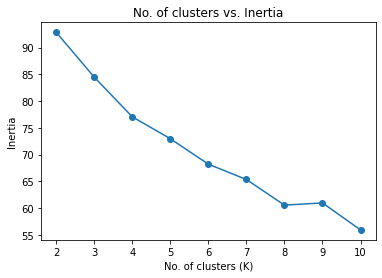

In [39]:
options = range(2,11)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)
    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xlabel('No. of clusters (K)')
plt.ylabel('Inertia');

In this "elbow" plot we don't see a sharp reduction in inertia to select the ideal amount of groups. We think, from this plot we should take 4 clusters.

#### 4 clusters

Let's to some classification using 4 groups.

In [40]:
# Let's creat a model
model = KMeans(n_clusters = 4, random_state=42).fit(X)
model.inertia_

77.06449033629866

In [41]:
# Let's do some predictions (classification)
predictions = model.predict(X)

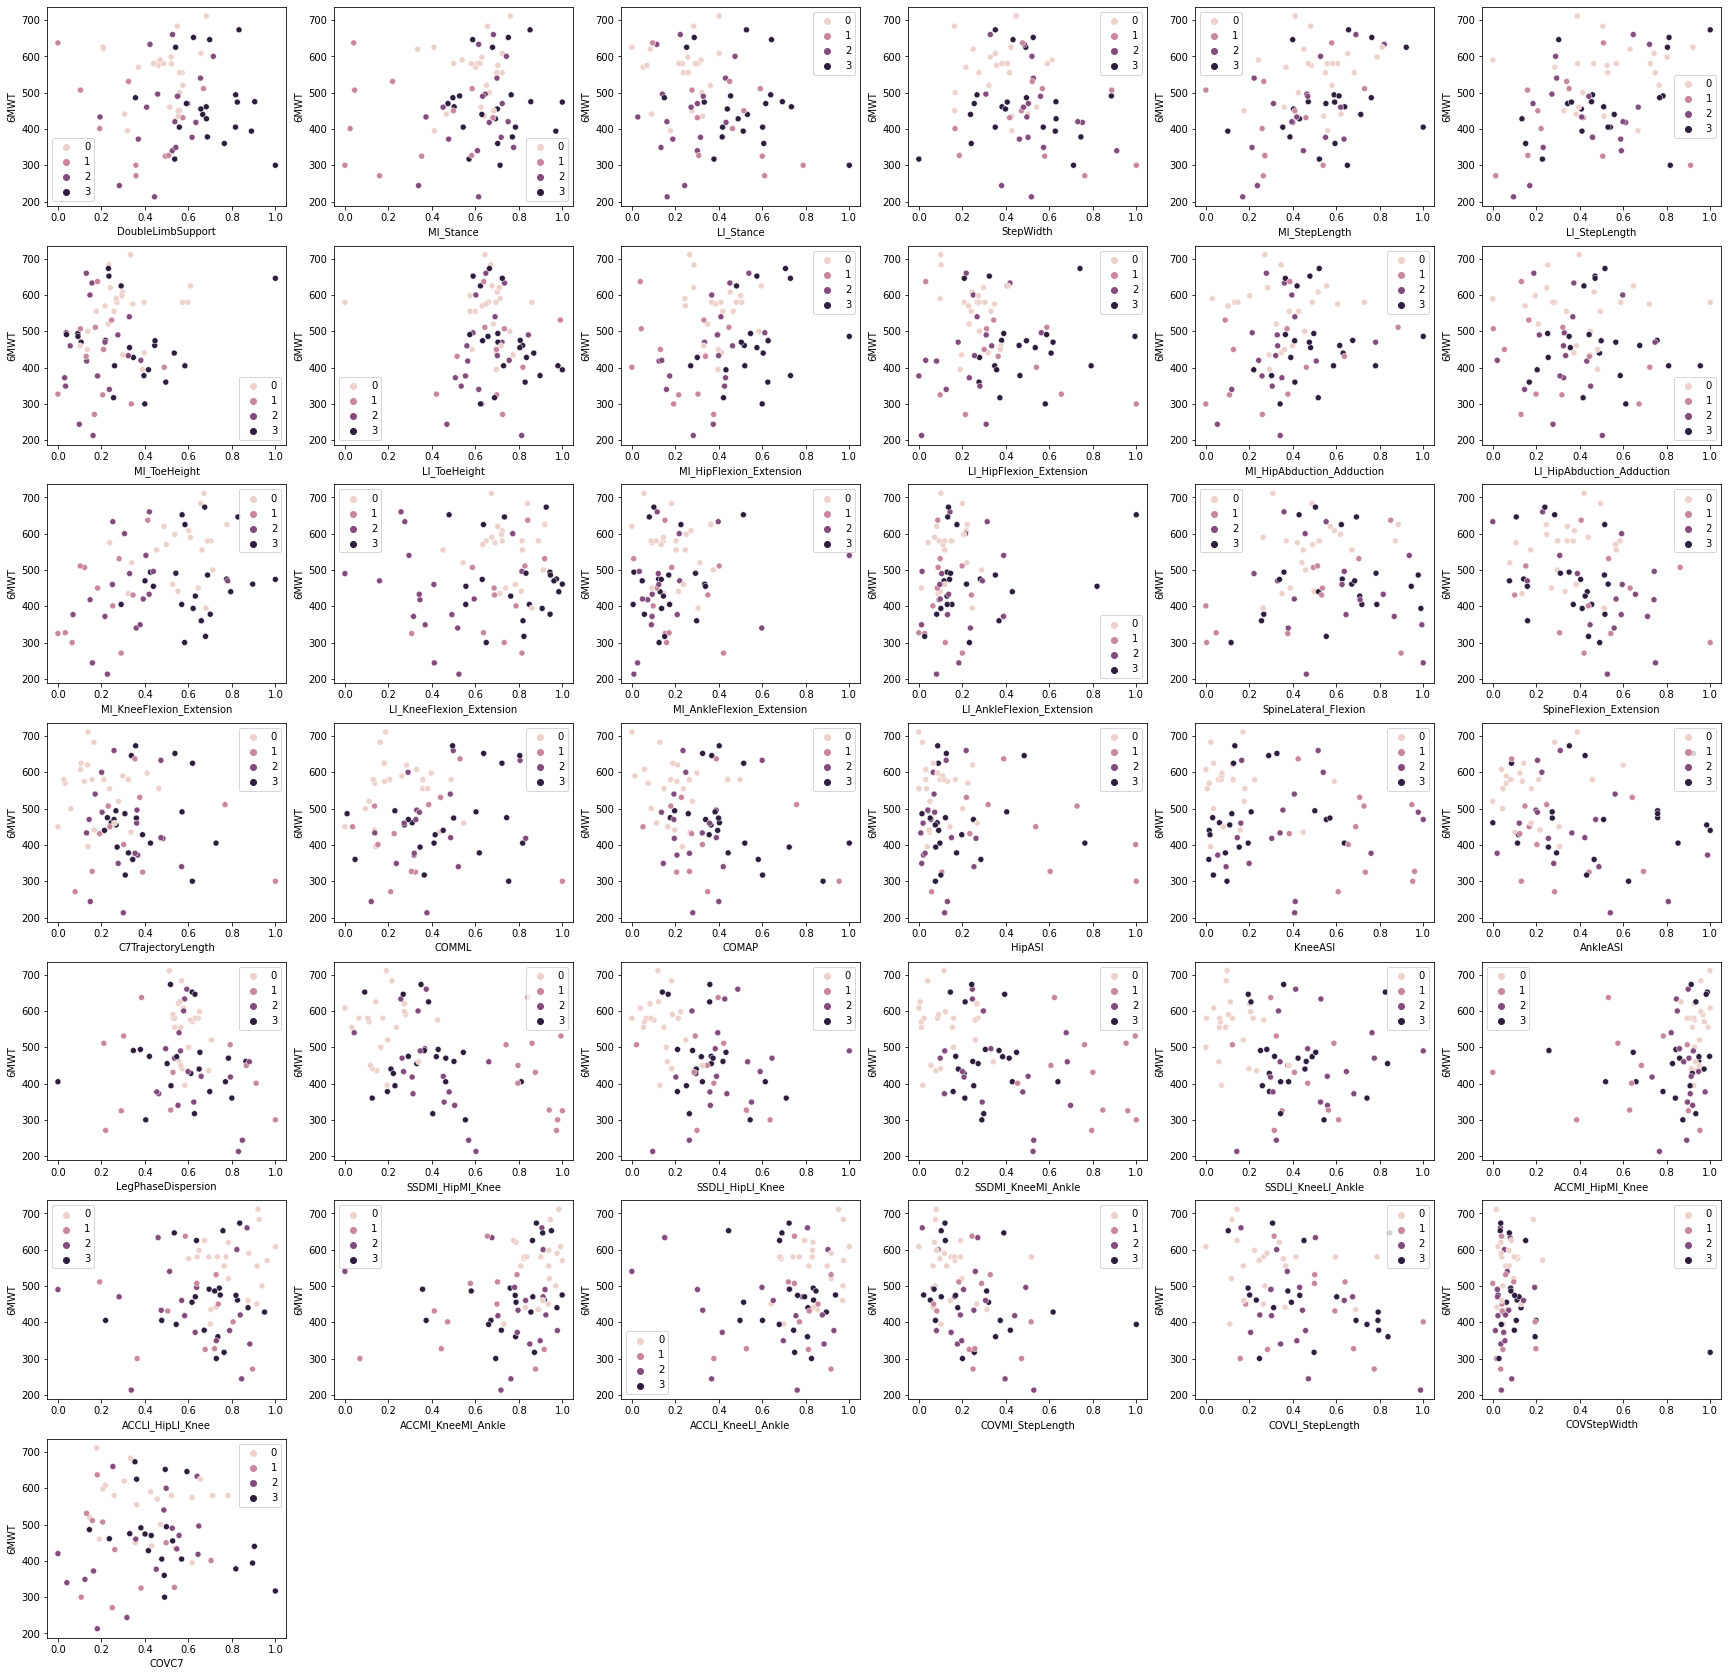

In [42]:
plt.figure(figsize = (30,30))
plt.title('Gait parameters vs 6MWT')
for i in range(0, len(X.columns)):
  plt.subplot(7, 6, i+1)
  sns.scatterplot(x = X.iloc[:,i], y = df['6MWT'], hue=predictions)
  plt.xlabel(X.iloc[:,i].name)
  plt.ylabel('6MWT')

In all the above plots, we do not see distinct clusters.

Let's try with 2 clusters, since we have MS and SCI. 



#### 2 clusters

In [43]:
# Let's create a model
model = KMeans(n_clusters = 2, random_state=42).fit(X)
model.inertia_

92.8555048270041

We have a higher inertia than with 4 groups. But let's see if we can identify distinct clusters in the plots.

In [44]:
# Let's do some predictions (classification)
predictions = model.predict(X)

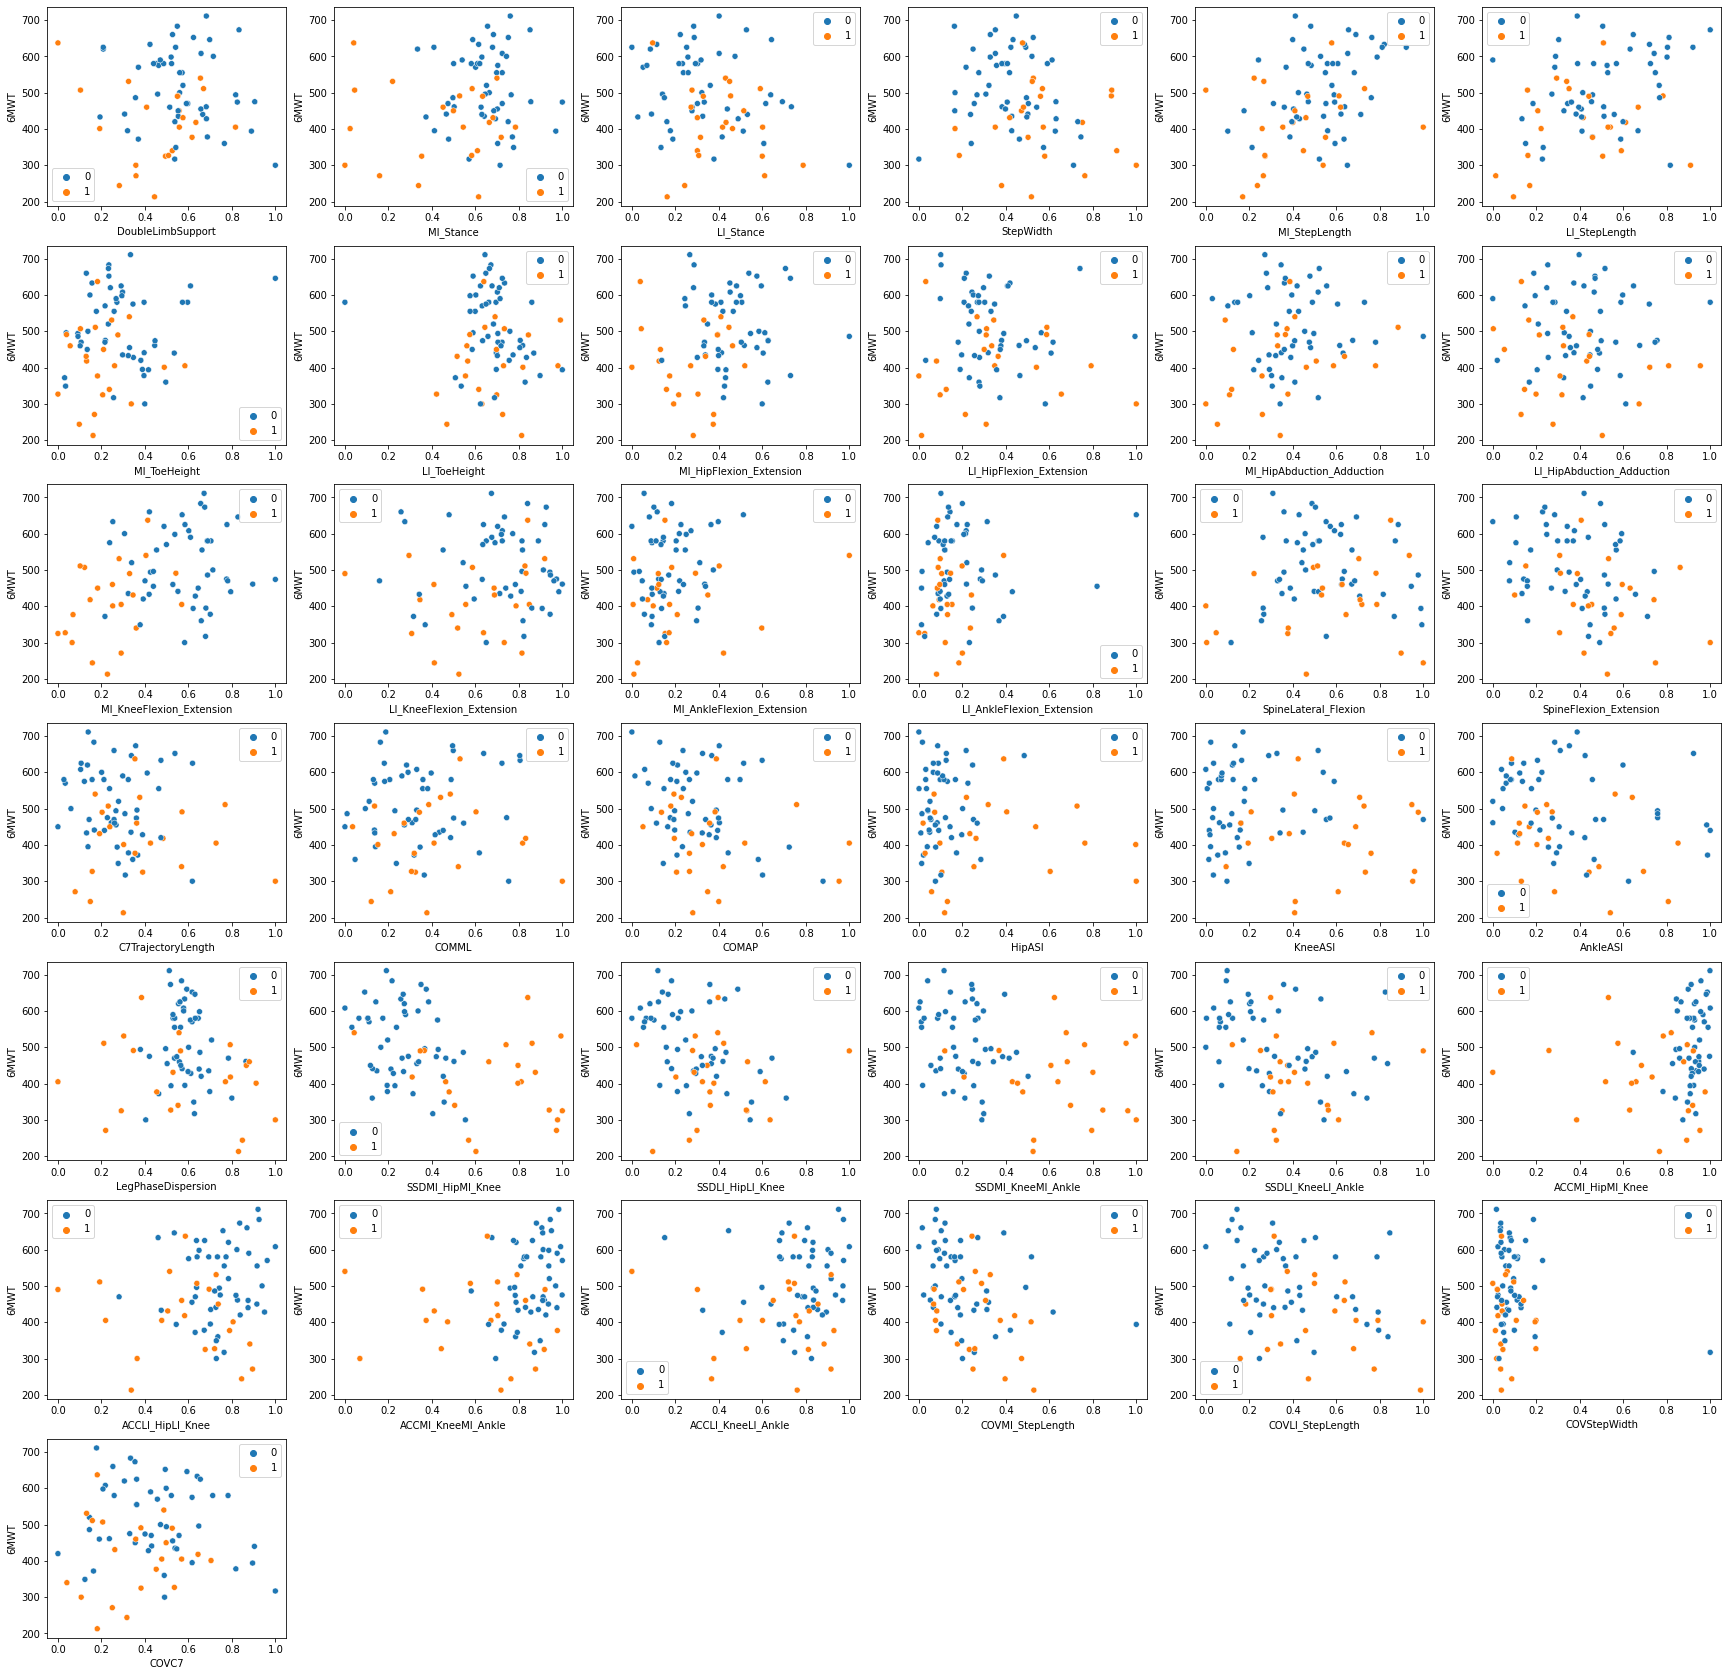

In [45]:
plt.figure(figsize = (30,30))
plt.title('Gait parameters vs 6MWT')
for i in range(0, len(X.columns)):
  plt.subplot(7, 6, i+1)
  sns.scatterplot(x = X.iloc[:,i], y = df['6MWT'], hue=predictions)
  plt.xlabel(X.iloc[:,i].name)
  plt.ylabel('6MWT')

Again, even with only 2 groups, we do not see distinct cluster.

It seems that using the gait parameters to find clusters in our dataset to not be optimal. Let's try with the 6MWT outcome as feature.

## Clustering with the 6MWT 

Intituively we could divide the population based on the 6MWT outcome into 2 groups: poor walkers and good walkers. We could do that by using the mean 6MWT of the entire population and assign patients in the poor walker group if they have a 6MWT below the mean or in the good walker group if they are above the mean.

### Based on the mean 6MWT

In [75]:
Mean6MWT = np.mean(df['6MWT'])
print('The mean 6MWT of the entire population is {} meters'.format(round(Mean6MWT)))

The mean 6MWT of the entire population is 482 meters


Let's assign the patients into the 2 different groups based on the mean 6MWT and save it in a new column named Walking_2group.

In [76]:
for i in range(0,71):
  if df.loc[i,'6MWT'] <= Mean6MWT:
    demographics.loc[i, 'Walking_2group_meanbased'] = 'Poor walker'
  else:
    demographics.loc[i, 'Walking_2group_meanbased'] = 'Good walker'
demographics.head()

,PatientID,Gender,Age,Pathology,Disease_duration,EDSS,Lesion_Level,AISA,6MWT,MI_Leg,Lesion_group,Age_group,Walking_2group,Walking_2group_meanbased
0,1,F,45,SCI,12.0,NaN,T10,D,608,L,Paraplegic,Young,Good walker,Good walker
1,2,M,30,SCI,7.0,NaN,T11,D,580,R,Paraplegic,Young,Good walker,Good walker
2,3,M,73,SCI,189.0,NaN,C7,D,660,L,Tetraplegic,Old,Good walker,Good walker
3,4,M,43,SCI,165.0,NaN,C4,D,435,L,Tetraplegic,Young,Poor walker,Poor walker
4,5,M,41,SCI,150.0,NaN,C7,D,683,R,Tetraplegic,Young,Good walker,Good walker


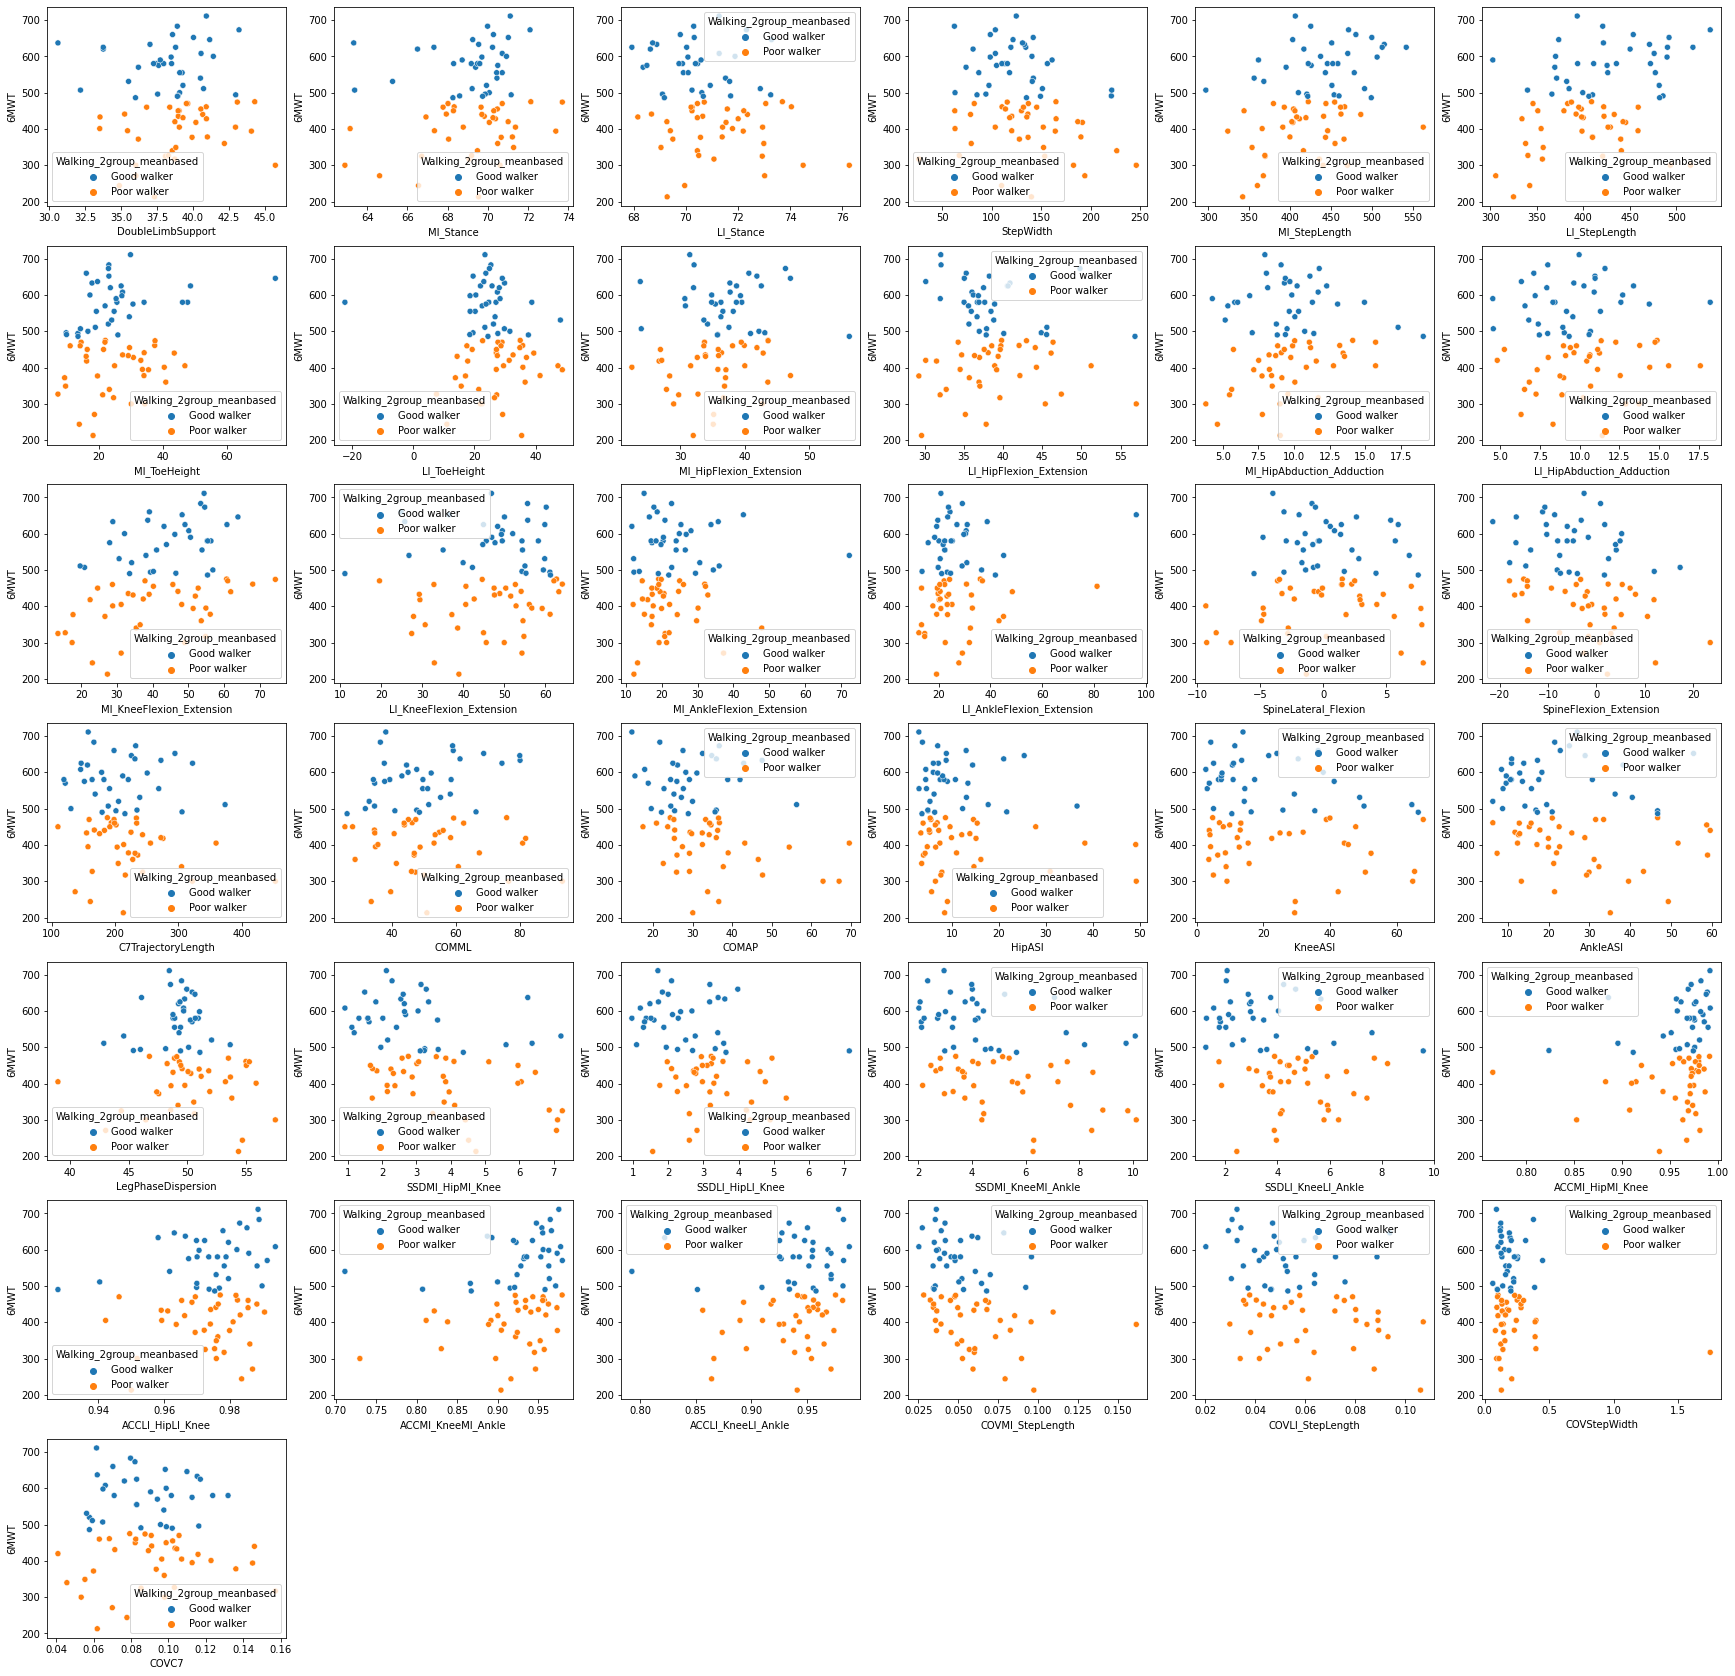

In [77]:
plt.figure(figsize = (30,30))
plt.title('Gait parameters vs 6MWT')
for i in range(1, 38):
  plt.subplot(7, 6, i)
  sns.scatterplot(x = df.iloc[:,i], y = df['6MWT'], hue = demographics['Walking_2group_meanbased'])
  plt.xlabel(df.iloc[:,i].name)
  plt.ylabel('6MWT')

We can clearly distinguished 2 groups. This seems more optimal compared to what we did before. 

Let's apply k-means clustering.

### k-means clustering with 6MWT

In [78]:
# Let's create a dataframe with our features of interest
X = pd.DataFrame()
X['PatientID'] = demographics['PatientID']
X['6MWT'] = demographics['6MWT']
X.head()

,PatientID,6MWT
0,1,608
1,2,580
2,3,660
3,4,435
4,5,683


Let's have a look at the elbow plot to see what is the optimal number of groups.

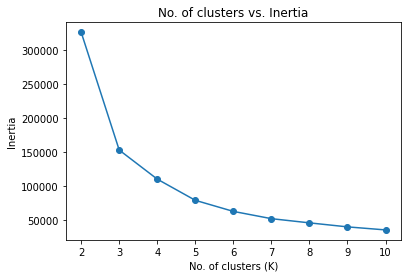

In [79]:
options = range(2,11)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)
    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xlabel('No. of clusters (K)')
plt.ylabel('Inertia');

From the above plot, we can see a sharp decrease for 3 clusters. Let's create a model using 3 clusters.

### 3 clusters

In [80]:
model = KMeans(n_clusters = 3, random_state=42).fit(X)
model.inertia_

153185.87175324679

In [81]:
predictions = model.predict(X)

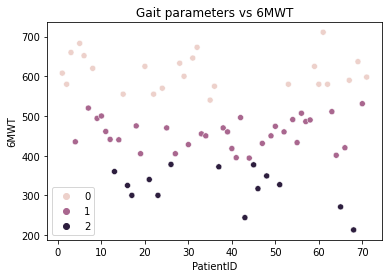

In [82]:
plt.title('Gait parameters vs 6MWT')
sns.scatterplot(x = X['PatientID'], y = X['6MWT'], hue = predictions)

From the above plot, we can see 3 dinstinct clusters corresponding to: poor walkers (2), moderate walkers (1) and good walkers (0).

But do we also see 3 distinct clusters when we plot the gait parameters vs the 6MWT?

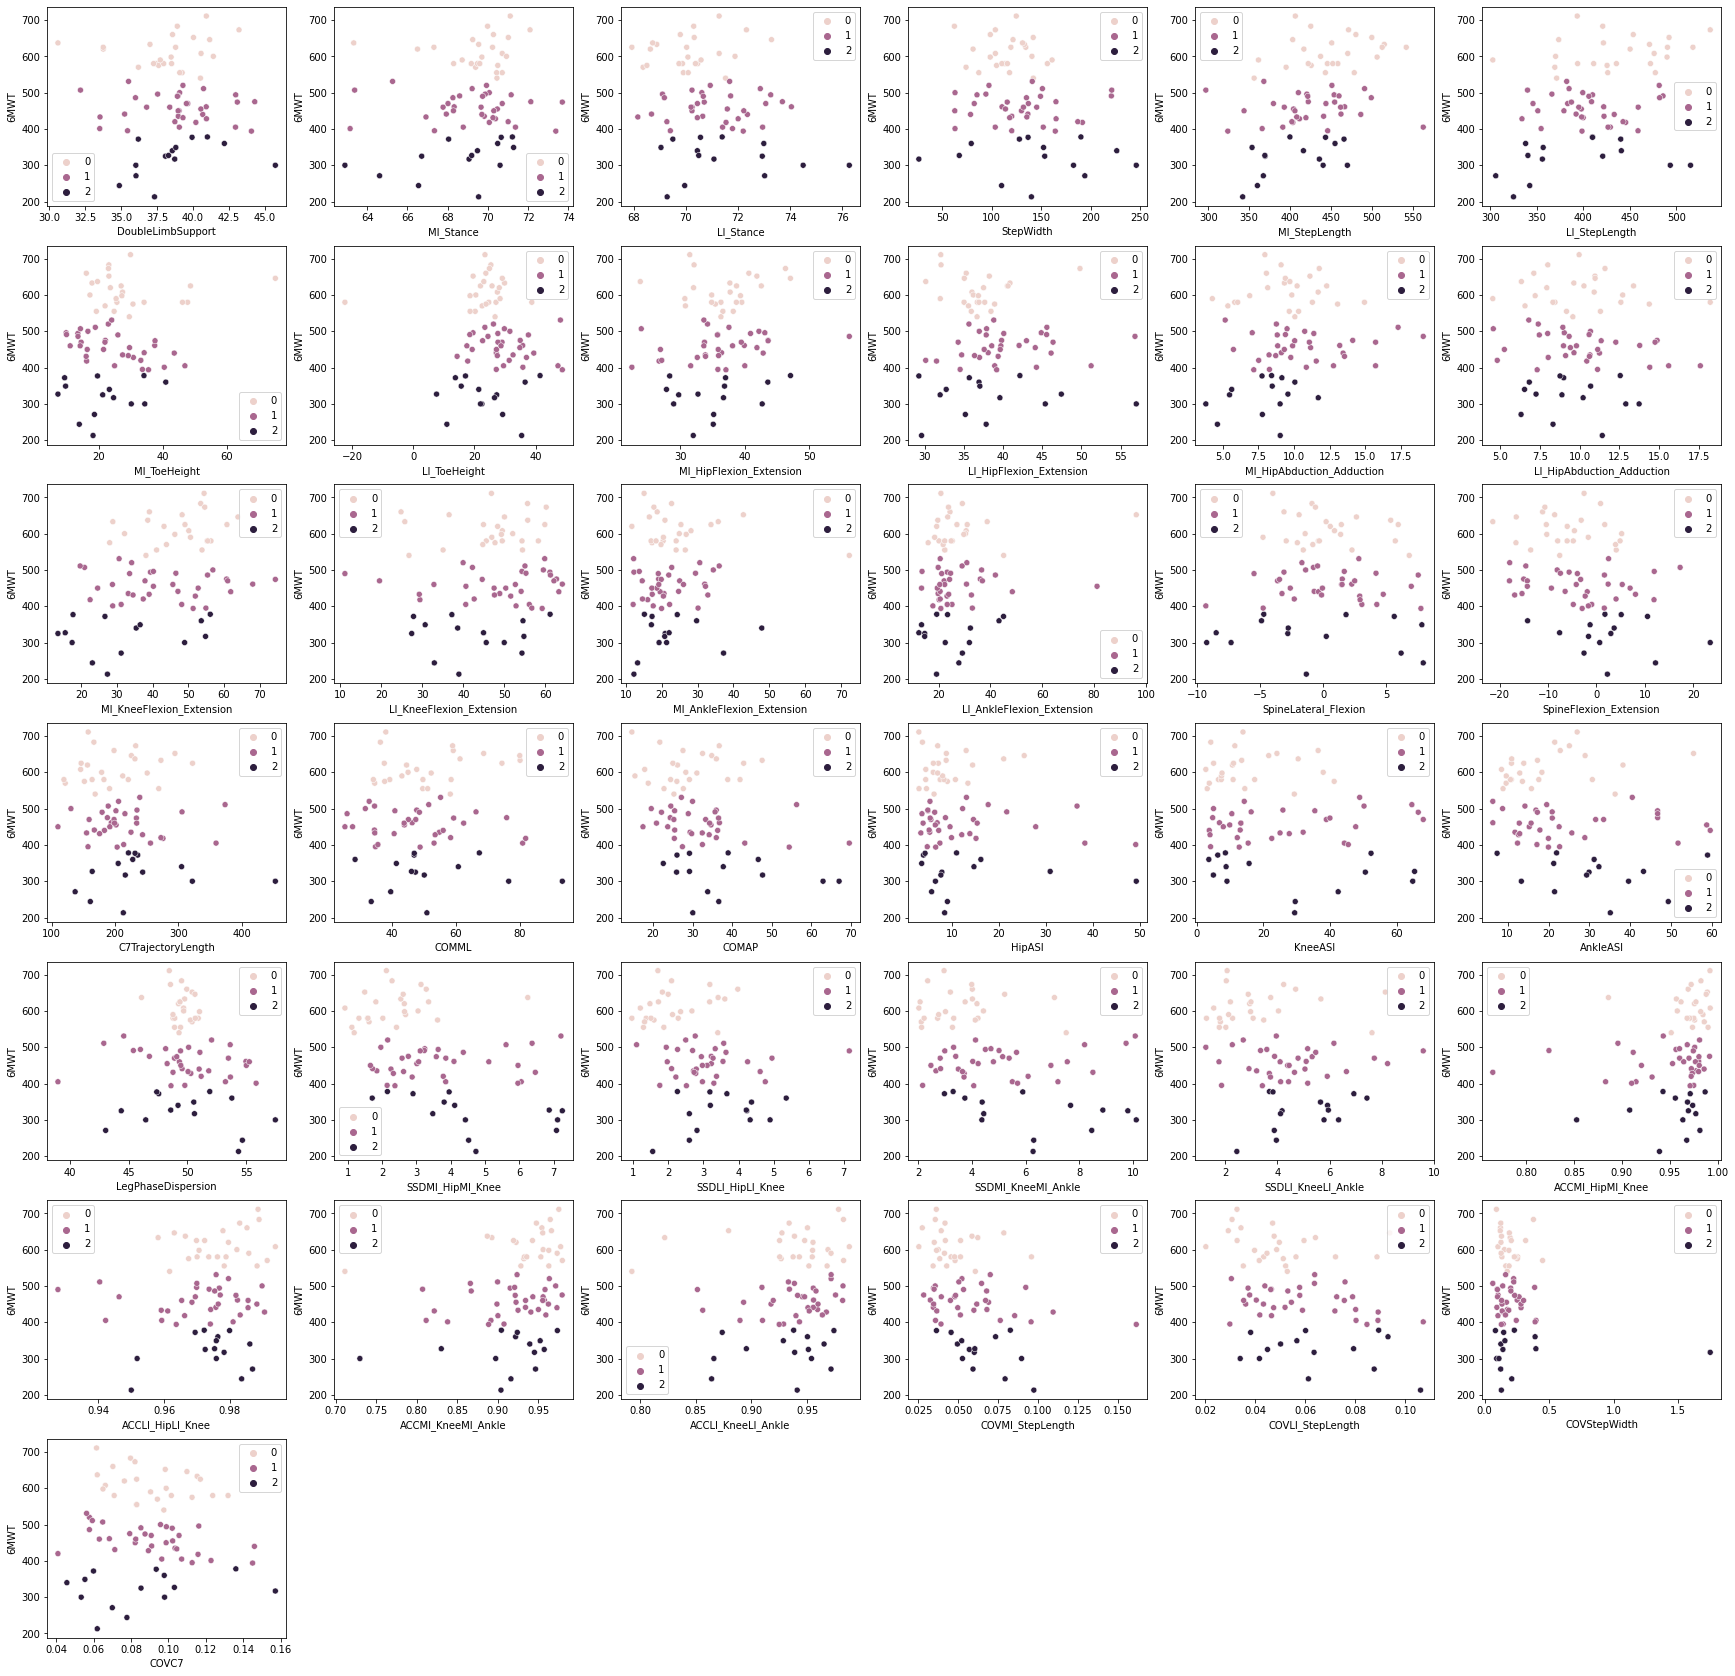

In [83]:
plt.figure(figsize = (30,30))
plt.title('Gait parameters vs 6MWT')
for i in range(1, 38):
  plt.subplot(7, 6, i)
  sns.scatterplot(x = df.iloc[:,i], y = df['6MWT'], hue = predictions)
  plt.xlabel(df.iloc[:,i].name)
  plt.ylabel('6MWT')

We also see the 3 groups distinctly when we plot the gait parameters vs the 6MWT.

Let's save these 3 classes into a new column called "Walking_3group" in the demographics dataframe.

In [87]:
demographics['Walking_3group'] = predictions
demographics.head()

,PatientID,Gender,Age,Pathology,Disease_duration,EDSS,Lesion_Level,AISA,6MWT,MI_Leg,Lesion_group,Age_group,Walking_2group,Walking_2group_meanbased,Walking_3group
0,1,F,45,SCI,12.0,NaN,T10,D,608,L,Paraplegic,Young,Good walker,Good walker,0
1,2,M,30,SCI,7.0,NaN,T11,D,580,R,Paraplegic,Young,Good walker,Good walker,0
2,3,M,73,SCI,189.0,NaN,C7,D,660,L,Tetraplegic,Old,Good walker,Good walker,0
3,4,M,43,SCI,165.0,NaN,C4,D,435,L,Tetraplegic,Young,Poor walker,Poor walker,1
4,5,M,41,SCI,150.0,NaN,C7,D,683,R,Tetraplegic,Young,Good walker,Good walker,0


In [88]:
print('Walking 3 group:')
print('0: good walker')
print('1: moderate walker')
print('2: poor walker')

Walking 3 group:
0: good walker
1: moderate walker
2: poor walker


### 2 groups

Let's do the same with 2 clusters.

In [89]:
model = KMeans(n_clusters = 2, random_state=42).fit(X)
model.inertia_

326574.9983388705

In [90]:
predictions = model.predict(X)

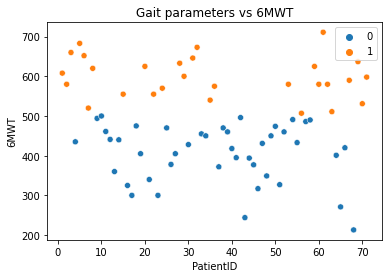

In [91]:
plt.title('Gait parameters vs 6MWT')
sns.scatterplot(x = X['PatientID'], y = X['6MWT'], hue = predictions)

From the above plot, we can see 2 dinstinct clusters corresponding to: poor walkers (0) and good walkers (1). This will be a bit confusing because in the 3 cluster analysis, 0 correpsonds to good walkers. Let's keep the same notation for the 2 cluster analysis.


In [106]:
for i in range(0, len(predictions)):
  if predictions[i] == 1:
    newpredictions[i] = 0
  else:
    newpredictions[i] = 1

print('Old predictions: ', predictions)    
print('New predictions: ', newpredictions)

Old predictions:  [1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1]
New predictions:  [0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0]


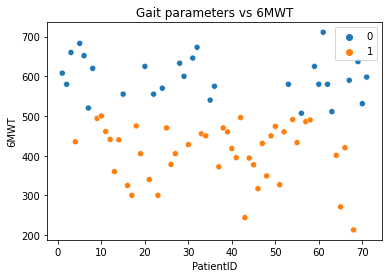

In [107]:
plt.title('Gait parameters vs 6MWT')
sns.scatterplot(x = X['PatientID'], y = X['6MWT'], hue = newpredictions)

We can see now that class 0 corresponds to good walkers as for the 3 cluster analysis.

Do we also see 2 distinct clusters when we plot the gait parameters vs the 6MWT?

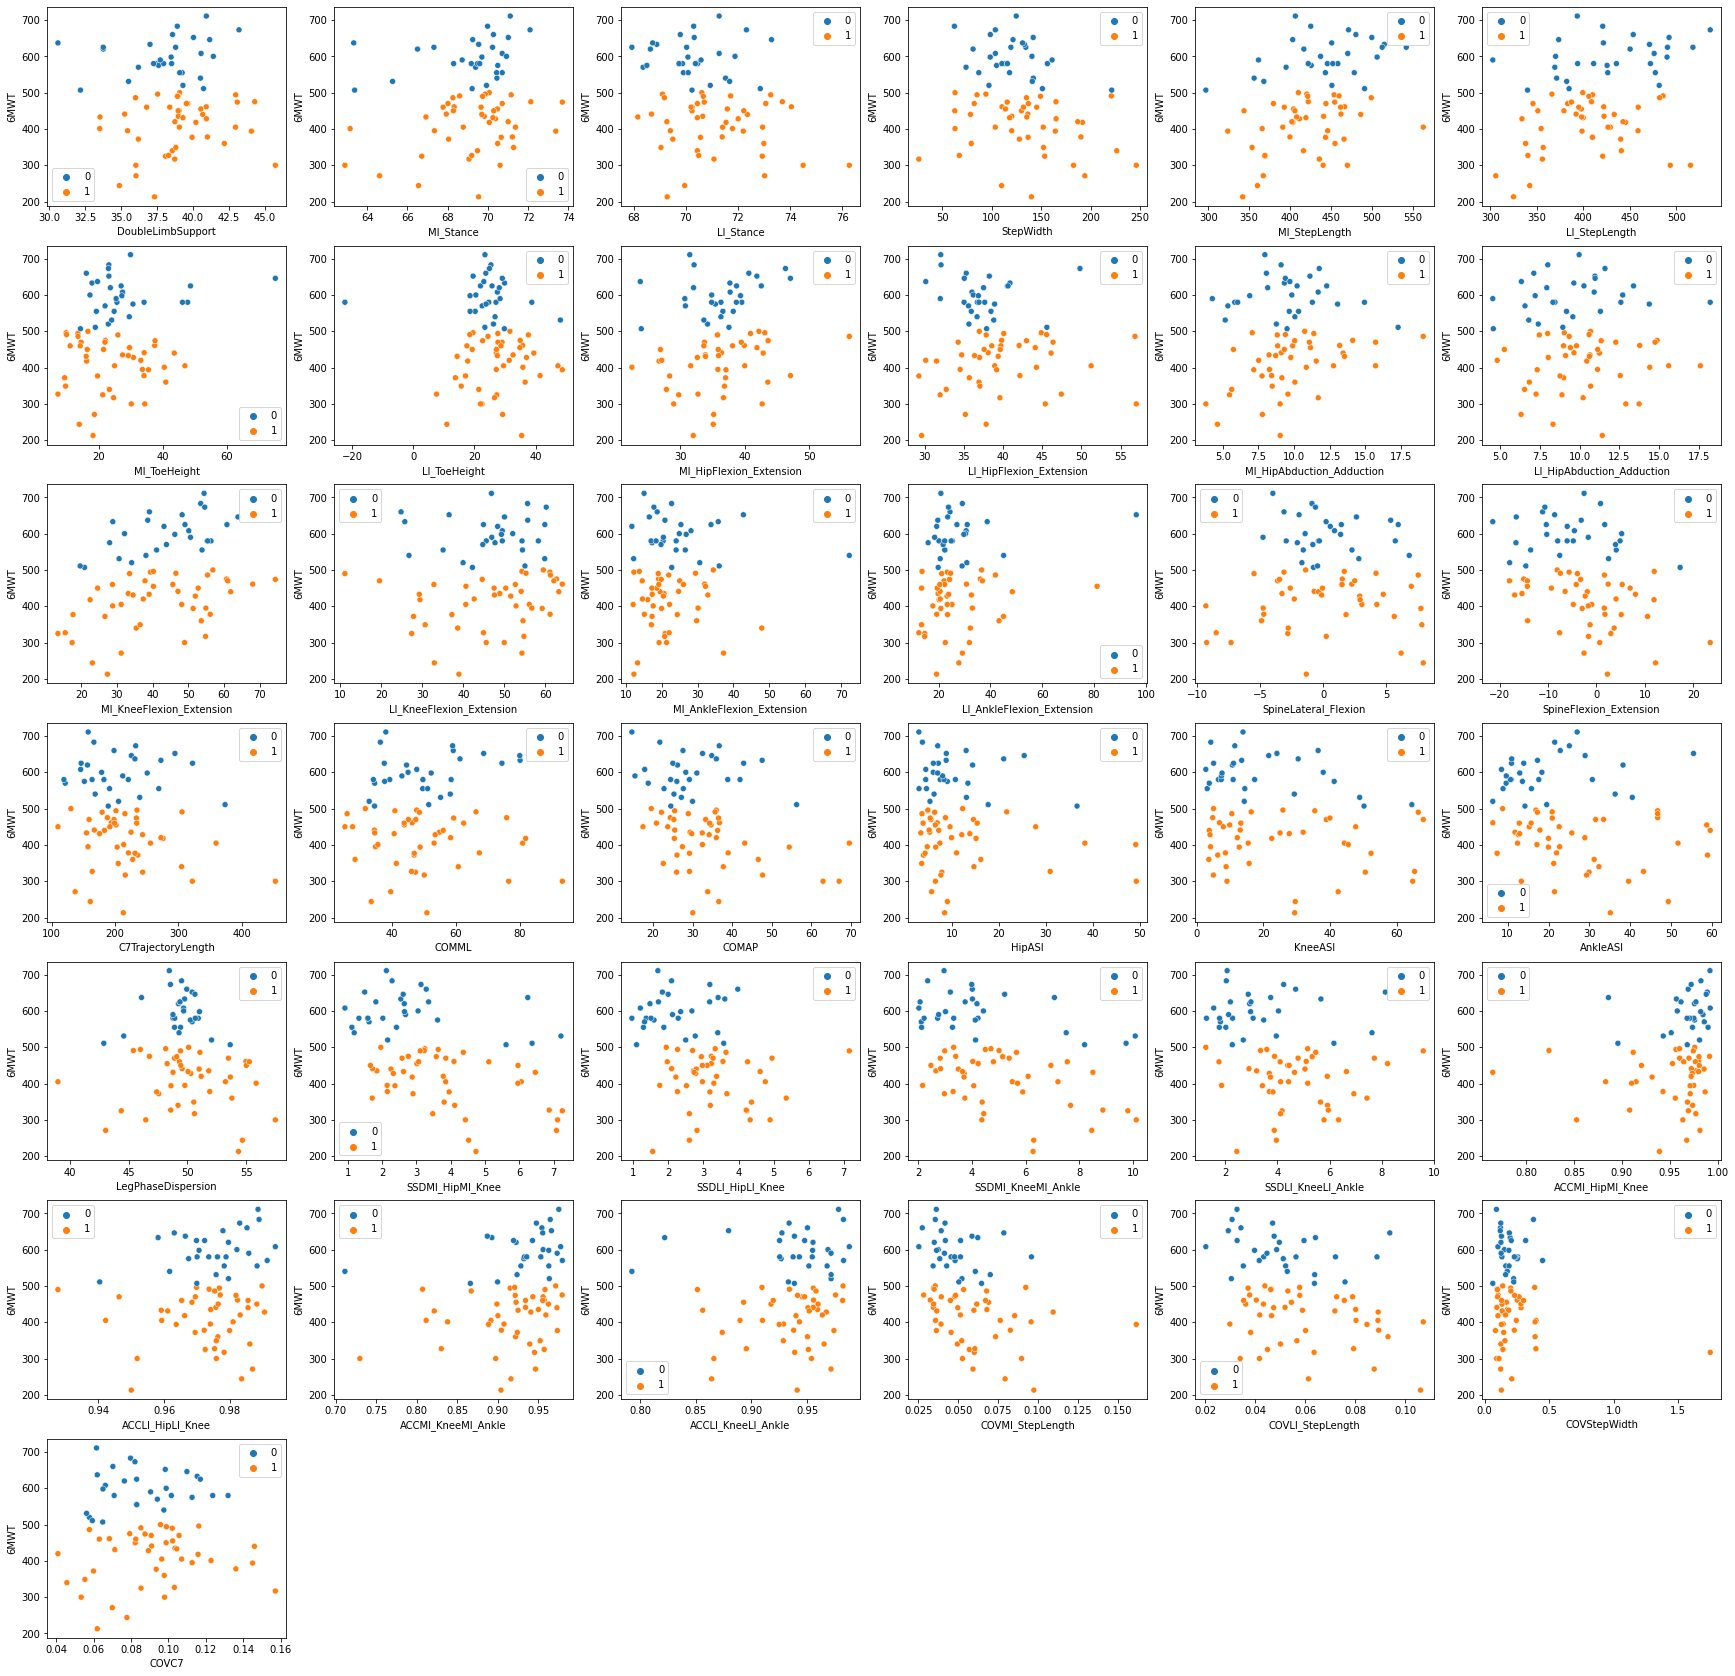

In [108]:
plt.figure(figsize = (30,30))
plt.title('Gait parameters vs 6MWT')
for i in range(1, 38):
  plt.subplot(7, 6, i)
  sns.scatterplot(x = df.iloc[:,i], y = df['6MWT'], hue = newpredictions)
  plt.xlabel(df.iloc[:,i].name)
  plt.ylabel('6MWT')

In the above plots, we can clearly see 2 distinct groups. 

Let's save these 2 classes in a new column called "Walkin_2group" in the demographics dataframe.

In [109]:
demographics['Walking_2group'] = newpredictions
demographics.head()

,PatientID,Gender,Age,Pathology,Disease_duration,EDSS,Lesion_Level,AISA,6MWT,MI_Leg,Lesion_group,Age_group,Walking_2group,Walking_2group_meanbased,Walking_3group
0,1,F,45,SCI,12.0,NaN,T10,D,608,L,Paraplegic,Young,0,Good walker,0
1,2,M,30,SCI,7.0,NaN,T11,D,580,R,Paraplegic,Young,0,Good walker,0
2,3,M,73,SCI,189.0,NaN,C7,D,660,L,Tetraplegic,Old,0,Good walker,0
3,4,M,43,SCI,165.0,NaN,C4,D,435,L,Tetraplegic,Young,1,Poor walker,1
4,5,M,41,SCI,150.0,NaN,C7,D,683,R,Tetraplegic,Young,0,Good walker,0


In [110]:
print('Walking 2 group:')
print('0: good walker')
print('1: poor walker')

Walking 2 group:
0: good walker
1: poor walker


---
# Boqi
From here, the data analysis was done by Boqi Chen.